In [1]:
import scanpy as sc
#import session_info
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import seaborn as sns
import math
#from plotnine import *
#import scvi
import os
#import celltypist
#import scanpy
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(5,5))
%matplotlib inline
sc.settings.verbosity = 0




In [2]:
import gc
gc.collect()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "supp"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


# scRNA

In [3]:
# #FILE_NAME = "adata_scrna_v3.h5ad.final"
# FILE_NAME = "adata_scrna_freeze.h5ad"
# PATH2=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'
# # adata.write(f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}')
# adata=sc.read_h5ad(PATH2)
# # try:
# #     adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna_v1.h5ad.final')
# # except:
# #     import scanpy as sc
# #     adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_scrna_v1.h5ad.final')

# adata.obs["lvl5_annotation_new"]=adata.obs["lvl4_annotation"]

# # #adata=adata[adata.obs["tech"]!="xenium"]
# # adata

# adata

 
PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna'
adata=sc.read_h5ad(PATH)
#adata_=adata[adata.obs["tech"]=="xenium"].copy()
#adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
#adata=adata[adata.obs["tech"]!="xenium"].copy()


#adata=sc.read_h5ad(PATH2)
def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

 


# CHECK NORMALIZATION

In [4]:
adata.X[:20,:20].todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.X[:20,:20].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.55513152,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        

# Select new cells

In [6]:
CATEGORY="lvl5_annotation"

try:
    adata.obs["lvl3_annotation_patient_status"] = adata.obs[CATEGORY].astype(str) + "__" +  adata.obs["Patient_status2"].astype(str)
    #CATEGORY="lvl3_annotation_patient_status"
    adata.obs["lvl3_annotation_patient_status"].value_counts()
except:
    1
adata.obs[CATEGORY].value_counts()

lvl5_annotation
KC3                   298127
KC1                   153610
F2: Universal         110035
F1: Superficial        85656
VE3_Ven                71597
                       ...  
Eosinophil                48
Merkel cell               40
Skeletal muscle           16
KC_HF: IRS0                6
KC_HF: IRS_Cuticle         5
Name: count, Length: 106, dtype: int64

In [7]:
small_cats = adata.obs[CATEGORY].value_counts()
small_cats = small_cats[small_cats < 500]
print(small_cats)

lvl5_annotation
KC_HF: HFSC                       490
Satellite cell                    464
KC_HF: Matrix                     455
KC_HF: IRS1                       401
F6: Inflammatory myofibroblast    378
Adipocyte                         364
KC_HF: HS                         344
Mac_TREM2+LPL+                    308
ILC_Prolif                        278
KC_HF: SPON2+                     222
Tc_Prolif                         183
VE3_Ven_APLN+                     181
ILC1_NCR2+P2RX7+                  114
KC_Sebocyte_GlandInner             78
Eosinophil                         48
Merkel cell                        40
Skeletal muscle                    16
KC_HF: IRS0                         6
KC_HF: IRS_Cuticle                  5
Name: count, dtype: int64


# Plot

In [13]:
adata_i = adata[(adata.obs["lvl5_annotation"].str.startswith("Eos"))|
                (adata.obs["lvl5_annotation"].str.startswith("Adipo"))|
                (adata.obs["lvl5_annotation"].str.startswith("Merke"))|
                (adata.obs["lvl5_annotation"].str.startswith("ASIC"))|
                (adata.obs["lvl5_annotation"].str.startswith("Mecha"))|
                (adata.obs["lvl5_annotation"].str.startswith("Mac_CX"))|
                (adata.obs["lvl5_annotation"].str.startswith("MigDC"))|
                  (adata.obs["lvl5_annotation"].str.startswith("Trans"))
               
               
               ]
adata_i.obs[CATEGORY].value_counts()

lvl5_annotation
MigDC (cDC2)              6248
Mac_CX3CR1+               2289
MigDC (cDC1)              1489
TransitionalDC             823
ASIC2+_Mechanoreceptor     792
Adipocyte                  364
Eosinophil                  48
Merkel cell                 40
Name: count, dtype: int64

In [14]:
sorted(adata_i.obs[CATEGORY].unique())

['ASIC2+_Mechanoreceptor',
 'Adipocyte',
 'Eosinophil',
 'Mac_CX3CR1+',
 'Merkel cell',
 'MigDC (cDC1)',
 'MigDC (cDC2)',
 'TransitionalDC']

In [15]:
ORDER = [ 'Merkel cell', 'ASIC2+_Mechanoreceptor',
 'Adipocyte',
 'Eosinophil',
 'Mac_CX3CR1+',
 'TransitionalDC',
 'MigDC (cDC1)',
 'MigDC (cDC2)',
]

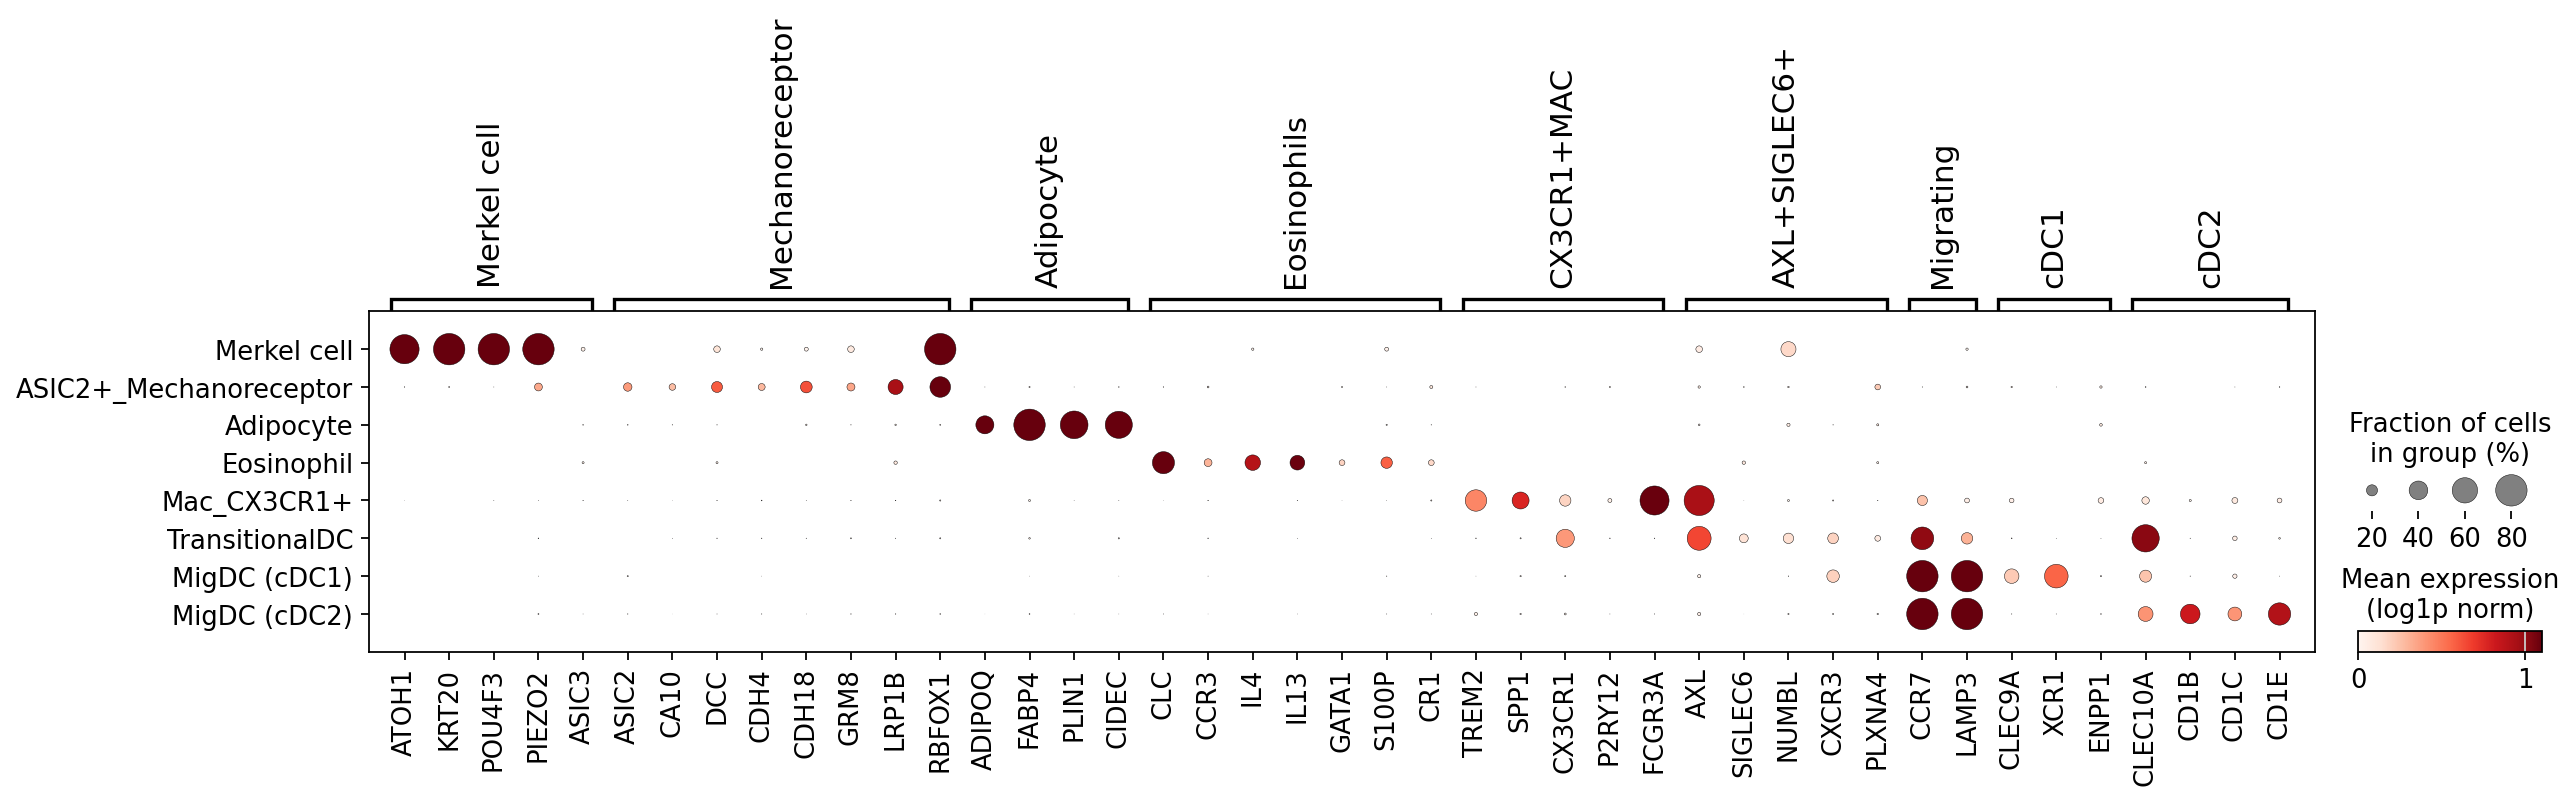

In [20]:
MARKER_GENES = {
     
    
            "Merkel cell": ["ATOH1", "KRT20", "POU4F3", #"TRPM2", 
                            "PIEZO2", "ASIC3",  ],
    "Mechanoreceptor": ["ASIC2","CA10", "DCC", "CDH4", "CDH18","GRM8",
                        "LRP1B", #"IL1RAPL1","CTNNA2", "SUGCT", "NRXN1", "OPCML", 
               "RBFOX1", #"DOK6", 
               #"HYDIN", #"RYR3",
             #  "RALYL", "GRM7", "NDST3",  'CSMD1','LHFPL3'
               #"HULC", "RYR3", "DMD", "ROBO2", "TENM2", "NRG3", "PCAT1", "CACNA2D3", 
               #"DLC1", "NAV3"
              
                       ],
   # "Other ASIC": ["ASIC1", "ASIC4"],
    
   
        "Adipocyte": ["ADIPOQ",  "FABP4", "PLIN1", "CIDEC"],
# 'TREM2+ADAMDEC1+': ['TREM2', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
     "Eosinophils": [ "CLC", "CCR3",# "CCL23",
       "IL4", "IL13", #"IL5", "IL9",
                                   "GATA1",  "S100P", 
            "CR1",
               #                      #"CACNA1D",  "MS4A3", "TCN1", "PRSS3", "CYP11A1", "KLF5",
               # "EGR3", "TNFSF11", "CD200R1", "IL1RL1", "ADGRG3", "NDFIP2",
               # "LYPD6B","CACNG8", "KRT81", "CYP11A1", 
               # "PTGDR2", "P2RY1","CHRM3-AS2","IL18RAP",
            
            
],
 'CX3CR1+MAC': ['TREM2', 'SPP1', # "LPL", 
                'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                 'FCGR3A', 
                # 'TGFBR1', 'PRKCH', 'CD93',# 'HTRA1',
                # "ADRB1",
               ], 
                 
             'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', #'IFI27', 
                              'CXCR3', 'PLXNA4',# 'KDR', "SELL",
                           #  "TNFSF4", "TCF4"
                             ],
              'Migrating': ['CCR7', 'LAMP3',  ], 
 'cDC1': ['CLEC9A', 'XCR1', "ENPP1", #"PPY", "BTLA", "TLR3"
         ],
 'cDC2': ['CLEC10A', 'CD1B', 'CD1C',# "CD163", 
          'CD1E', # 'CD5', 
          #'SPIB', 'TNFSF4', 'TSPAN2'
         ],


    

               
      #  "Plasma_in_immuneonc": ["MZB1", "CENPV", "CXCL13", "RORC", "MCEMP1", "AIRE"]

               
}

sc.pl.dotplot(
    adata_i,
    MARKER_GENES,
    groupby=CATEGORY,
   # standard_scale="var",
    vmax=1.1,
    colorbar_title="Mean expression\n(log1p norm)",
    dendrogram=False,
    categories_order=ORDER,
    save="supp_raredotplot.pdf",
    dot_max=.8
) 


In [ ]:
stop

In [ ]:

adata_5k_i = adata_5k[(adata_5k.obs["lvl0"].str.startswith("T"))
                    # (adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
                    #    (adata_5k.obs[CATEGORY].str.startswith("Bcell"))
                     ]
adata_5k_i.obs[CATEGORY].value_counts()


In [ ]:
import pandas as pd
desired_order = ['Treg','Treg_LRRC32','Treg_LRRC32+', 'TR1', 'Tnaive', 'Tnaive1', 'Tnaive2', 'Tnaive/T_cm', 'Tnaive/Tcm',
                 'T_polarized_CCR6+', 'Th', 
                 'Th_PPARGhi', 'Th_PPARGhi_IL17+',
                 'Tc',
                 'Tc_IFNGhi',"Tc_IL9R+GPR15hi",
            'Tc_IL13','TRM_IL13',"TRM_IL13+",
'TRM_IL17','TRM_IL17+',  'TRM_ZNF683+', "Tc_ZNF683+", "T_γδ", 'TRM',
              'Th2','T_polarized',
                
                 



'NK',








'ILC1/NK',
'ILC1',
'ILC3','ILC2/TRM17', "ILC2/3", 'ILC2', 'ILC3_CCL1+PTGDS+', 'ILC_prolif',

                
                 'T_Prolif','T_prolif',    'T',
                'Plasma cell', 'Bcell'
                ]

ORDER_T2=desired_order
# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        

# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)


In [ ]:
import pandas as pd
desired_order = [ 'Treg',"Treg_LRRC32",'Treg_LRRC32+',
                  'Tr1','TR1','T_lowq maybe',
                'Tnaive',
                  'Tnaive/Tcm','Tnaive/Tcm,1','Tnaive/Tcm,0','Tnaive (blood)','TRM/Tnaive',
    
                 'T_CD4_naive','Th_MCAMhi_PTGS2+', 
                  'Th','Th_MCAMhi',
                 'Th_CXCR6+',
                 'Th_PPARGhi',
                 'Tc0',
                 'Tc0_IL9R+_GPR15hi',"Tc_IL9R+GPR15hi",'Tc_GPR15hi',
                 'T','Tc_naive','Tc1',
                  'Tc','Tc2','Tc_IFNGhi1',
                  'Tc_IFNGhi','Tc1_IFNGhi', 'Tc_IFNGhi2', 'Tc2_IFNGhi',
                 'Tc3_IFNGhi',
                 
                 
                 'TRM_IL13+',
'TRM_IL17+_Cytotoxic',                 'TRM_IL17+_other',


                  'Tc_IL13','TRM_IL22_2','TRM_IL22','T*RM*_IL22','TRM_IL13',
                  'Tc_IL17','TRM_IL17+mixed','TRM_IL17+','TRM_IL17','TRM_IL17lo','T_ITGA1hi',

 'Tc_gamma_delta','Tc_ZNF683+/γδ', "T_γδ",  'TRM_ZNF683+', 'Tc_ZNF683+','TRM_ZNF683+ITGA1+',

 'NK',

 'ILC1_NK','ILC1_NK_cycling',
                 'ILC1','ILC1_NCR2+P2RX7+',



'ILC3',
    'ILC1_3','ILC1_3_cycling',    'ILC1_3_CCL1hi_cycling',
"ILC3 CCL1+PTGDS+",
                 "ILC3_CCL1+PTGDS+",
                 'ILC_prolif',













              #    'ILC1_3',
 'ILC2', 'ILC2_inflammatory','ILC_SELL+CCR7+',
                 'Bcell', 'Plasma cell','T_cycling','T/Melanocyte????','ILC-like/Myeloid',
             





'T*',
'T**_naive',
'T**',



'T_Prolif',


'Eosinophils', 
'Eosinophil',"missing",
                 
                 
                 










                 


 ]
ORDER_T=desired_order


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        

# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)


In [ ]:
# genes = [
#     "LAMP1",
#     "B3GAT1",
#     "FOXP3",
#     "CR2",
#     "CD38",
#     "GZMB",     # Granzyme B
#     "TOX",
#     "TCF7",     # TCF-1CD21
#     "CD79A",
#     "ENTPD1"  ,  # CD39
#     "CD68",
#     "CD4",
#     "CD44",
#     "PTPRC",     # CD45
#     "PTPRC",     # CD45RO is an isoform of CD45
#     "ITGAX",     # CD11c
#     "CD8A",      # CD8 is CD8A/CD8B; CD8A is most commonly used
#     "HLA-A",
#     "HLA-DRA",   # HLA-DR is a complex; HLA-DRA is a typical representative
#     "CD14",
#     "MS4A1",     # CD20
#     "CD3E",
#     "NCAM1",     # CD56
#     "IFNG",
#     "IDO1",
#     "PDCD1",     # PD-1
#     "ICOS",
#     "CD274",     # PD-L1
#     "VSIR",  # VISTA
#     "LAG3"
# ]


In [ ]:
ALL_T = {'Conventional': ['CD3D', ],
              'Treg': ['FOXP3', 'TIGIT',  "IL2RA"],
         "Activated_Treg": ["LRRC32", "IL1R1","IL1R2", "CCR8", #'TRAF3',  "ITGAV",
                            #'CMSS1', 'LRRC32',
                          #  'F5',# "TOX"
                         #  'ZNF331', 'JMY', 'ELL2','NR4A3',
                            'NR4A1',#'BICDL1',
                           "STAT5A", 
                            #"NRP1"

                           ],
              'TR1': [ #"CD69",
                            #'IFIT3',
                            #"SOCS1", 
                            "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
              'CTLA4',],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', "PAK2"],
 'Th': [ "CD4", 'CD40LG', "MCAM", "CCR6", "BACH2"],
                  "Cytotoxic": [ "NKG7","CCL5","GZMA",  ],

 'CD8A+ cytotoxic T cells': ['CD8A', 'GZMK', 'IFNG', 'TNFSF9',#"GZMH", "CXCR3", 
                             "CCL4", "CCL3", #"CCL3L1"# "MCOLN1"
                            ],
         "Tissue-residency\n markers": ["ITGAE",  "CD109", 'ZNF683', "ENTPD1", # "RBPJ"
                                        "ITGAV"
                                       ],
'IL22': ['IL22', 'IL13', 'PDLIM4', #'KRT7',
        # "NBAS", 
         'CCL1', #"CCL17", 
         "AREG", "CCR8", "IL9R", #"CCR4", "CCR10"
        ],
 'T_17': [ 'IL17A', 'IL17F', 'CXCL13', 'IL26', "IL21", 'CCL20', 'CTSH', "IL23R",
         "CCR6","RORC", 'TNFRSF8', "ADAM12", #"IL1R1", #"IL12RB2",
            'LRRN3',         'MYO7A',  "VDR", #"CD38",
       
         ],
         "Other": [    "PTPN13","ITGA1"],
         # "ITGA1hi": ["ITGA1", 
         #             'ZHX2',# 'TRPS1', 'TBC1D22A', 'ABLIM1', 
         #             'BICD1',#'MVB12B', 
         #             'PRR5L', # 'PCNX4', 'EPHA4', 
         #             'ST8SIA1', 
         #             'ZNF407',],
         #"Memory": ["CD69",],
              'Gamma-delta': ["FXYD2", "TRGC2", 'TRDV1','TRGV4',  "EMP1",
                             "NSG1", #"LINC02446","CD9", 
                              "MPZL2", "KLRC2"], #'TRGC2', 
             "Innate": [ "KLRC2", 'KLRC3', 
                        "KLRB1", "KIT", "KLRC1","TYROBP", "FCER1G",],
               
               "NK": [ "TBX21",#
                      "NCR1",#'NMUR1', "NMU",
                      "B3GAT1", 
                      "PTGDS",
                      "CX3CR1", # 
                      "CCL4L2", #
                    #
                      "PRSS23", "CD160", #
                      "KLRF1", "KLRG1","S100B",
                             
                      #"CD160", "PLEK", "NMUR1", "IL12RB1", "FGFBP2", "FCGR3A", "GZMH","AKR1C3","FGR", "CD38", 
                     # "LAIR2", "SPON2", "S1PR5","FCRL6","PRF1", 
                              ],
                      "NK+ILC1": ["KLRD1","NCAM1", "PRF1", "CEBPD"  #"IL15",
                                 ],
   'ILC1_NK': [ "IRF8",# 'GZMK', "IGFBP4",  "TCF7"
               #"IL18", 
               "ADGRG3", #"CXCR3",
               "P2RX7"
              ],
               "ILC1/3": [ "XCL1", "XCL2", "CSF2", "KRT86" , "CCL17"],

               "ILC3": ["ID3", #"ZNF683",
                        "ZBTB46", "TNFSF4", "SPINK2", "RAMP1", "MB", "KLRF2", "TMPRSS11E", #"CAMK1", "PECAM1"
                       ], #'TNF', "CCR8", "CD9"],

                "ILC2+3": ["IL9R", "TNFSF11"],
 'ILC2': ['GATA3',  "PTGDR2", "TNFRSF25",# "BCL11B", "MAF", 
          #"CALCRL", "HPGDS" ,  "S1PR1",
         ],
      'ILC2_inflammatory': [ "CRLF2", "IL17RB", "IL1RL1" , #"IL4", "IL13",'TNFRSF9',
                            "IL18R1", "PPARG",
                            "PTGS2", #"NBAS",# "PDLIM5", "MCAM", 
                            "PLA2G4A", "IL4", "IL31",
                           "ICOS", "NRROS"
                           ],
         "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
        
               }


# sc.pl.dotplot(adata_i, 
#               ALL_T,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var")


# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(ALL_T),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)



In [ ]:
ALL_T = {'Conventional': ['CD3D', "CD4", "CD8A"],
 'Treg': ['FOXP3', 'TIGIT', 'CTLA4', 'IL2RA'],
 'Activated_Treg': ['LRRC32',
  'IL1R1',
  'IL1R2',
 # 'CMSS1',
  'LAYN',
  'CCR8',
  'NR4A1'],
 'TR1': ['EOMES',
  'IL10',
  'LAG3',
  'HAVCR2',
  'PDCD1',
  'FOXB1',
  'TNFSF9',
  'VCAM1'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ICAM2', 'PASK', ],
 'GIMAPs': ['GIMAP1', 'GIMAP4', 'GIMAP5', 'GIMAP7'],
 'Th': ['CD4', 'CD40LG', 'MCAM', ],
         "CCR6+": ['CCR6', 'BACH2', "CXCR6"],
 'Th_PPARGhi': ['PPARG', 'BTD', 'KIF13B', 'DGKH', 'RORA-AS1','SPAG1'],
 'Th6': ['BACH2', 'XYLT1', 'GNAQ', 'PPARG',  'ZEB2', # 'PTGS2', 'MMP7',
        "ZHX2"],
         "CD8": ["CD8A"],
          'TC_IL9R': ['GPR15', 'CD8B2', 'IL9R', 'DONSON',
                     "AGAP1", "C12orf42", "GML", "CCR5",
                     ],

                
 'CD8A+ cytotoxic T cells': ["KLRG1", 'GZMK', 'CCL4', 'IFNG', 'TNFSF9', 'CCL3'],
         
 'Cytotoxic': ['NKG7', 'CCL5', 'GZMA'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
 'T_2': ['IL22', 'IL13', 'NBAS',# 'CCL17',
         'AREG', 'IL9R', 'PDLIM4', 'CCR8'],
 'TRM_IL13': ['ZBTB16', 'KLRC4', 'ADGRG1', 'RGS9'],
 'T_17': ['IL17A',
  'IL17F',
  'CXCL13',
  'CCL20',
  'IL23R',
  'RORC',
  'ADAM12',
  'LRRN3',
  'MYO7A',
  'IL21',
  'CTSH',
  'VDR',
  'CCR6',
  'IL26'],
 'Other': ['PTPN13', #'ITGA1'
          ],
 'ITGA1hi': ['ITGA1', 'ZHX2', 'BICD1', 'PRR5L', 'ST8SIA1', 'ZNF407', "KLRG1"],
 'Memory': ['CD69'],
 'Gamma-delta': ['FXYD2',
  'TRGC2',
  'TRDV1',
  'TRGV4',
  'EMP1',
  'NSG1',
  'MPZL2',
  'XCL1',
  'KLRC2',
  'KLRC3',
  'KLRD1',
  'TRDC',
  'VSTM2L',
  'LAT2',
  'SPINT2',
  'KRT86',
  'FCER1G',
  'TRDV1',
  'SPRY2'],
 'Innate': [#'KLRC2', 'KLRC3', 'KLRB1', 'KIT', 'KLRC1',
     'TYROBP',],
 'ILC2': ['GATA3', 'PTGDR2', 'TNFRSF25'],
 # 'ILC2_inflammatory': ['CRLF2',
 #  'IL17RB',
 #  'IL1RL1',
 #  'IL18R1',
 #  'PLA2G4A',
 #  'IL4',
 #  'IL31',
 #  'ICOS',
 #  'NRROS'],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A']}
 

# sc.pl.dotplot(adata_i, 
#               ALL_T,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var")


# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(ALL_T),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)



# planning markers for IF

In [ ]:
# adata_i = adata[(adata.obs["lvl0"].str.startswith("T"))|
#                 (adata.obs["lvl0"].str.startswith("KC"))|
#                 (adata.obs["lvl4_annotation"].str.startswith("Melano"))|
#                 (adata.obs["lvl4_annotation"].str.startswith("Merke"))
                
               
#                ]
# adata_i.obs[CATEGORY].value_counts()
# adata_5k_i = adata_5k[(adata_5k.obs["lvl0"].str.startswith("T"))|
#                                       (adata_5k.obs["lvl0"].str.startswith("KC"))|
#                          (adata_5k.obs["lvl4_annotation"].str.startswith("Melano"))|
#                 (adata_5k.obs["lvl4_annotation"].str.startswith("Merke"))
#                     # (adata_5k.obs[CATEGORY].str.startswith("Plasm"))|
#                     #    (adata_5k.obs[CATEGORY].str.startswith("Bcell"))
#                      ]
# adata_5k_i.obs[CATEGORY].value_counts()


In [ ]:
# GENES =   [
#     "KIT", "TYROBP", "KLRC1", "ADGRG3", "GZMK", "APOBEC3D",
#     "GZMK", "GZMA", "CXCR3", "GZMH", "ANKS6", "TCL1A", "ADGRG5", "APOM",
#     "PIK3R1"
# ]
# sc.pl.dotplot(adata_i, 
#               GENES,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#            #  categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )


# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(GENES),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)



In [ ]:
# GENES = [    "KIT", "TYROBP", "KLRC1", 
#     "MB", "SPINK2", "TMPRSS11E", "KRT86", "GSN", "KRT81",
#     "TNFSF11", "RARRES2", "PTGDS", "PDE6G", "TTLL10", "CCL1", "PTGDS"
# ]
# sc.pl.dotplot(adata_i, 
#               GENES,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#            #  categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )


# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(GENES),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)

In [ ]:
# genes=["CD8A","KLRC4", "IL9R", "CCR8", "IL13", "CD9", "NBAS", "KRT7", "TWIST1", "PDLIM4"]
# sc.pl.dotplot(adata_i, 
#               genes,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#            #  categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
#              )


# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(genes),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)

In [ ]:
# STOP

In [ ]:
# adata_i.shape

In [ ]:
# sc.pp.subsample(adata_i, 0.2)

In [ ]:
# # -----------------------------------------------------------------
# # 1) find which `niche12` categories have at least 15 cells
# # -----------------------------------------------------------------
# vc   = adata_5k_i.obs["niche12"].value_counts()
# keep = vc[vc >= 15].index          # categories to retain

# # -----------------------------------------------------------------
# # 2) subset AnnData, discarding categories with < 15 cells
# # -----------------------------------------------------------------
# adata_5k_i = adata_5k_i[adata_5k_i.obs["niche12"].isin(keep)].copy()

# # sanity-check


In [ ]:
# adata_i=adata[adata.obs["lvl4_annotation"].isin(["VE3_Ven_APLN+", "cDC2_cycling", "T_Prolif", "ILC_prolif"])]

In [ ]:
# import pandas as pd
# CATEGORY="lvl4_annotation"
# sc.tl.rank_genes_groups(adata_i, CATEGORY, method='wilcoxon', key_added="de_leiden");
# df2 = pd.DataFrame(adata_i.uns['de_leiden']['names'])
# df2.head(50)
# for i,x in enumerate(df2.columns):
#     print(i, " : ", x)


In [ ]:

# # # # import pandas as pd
# # #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]


# select_population = list(df2.columns)[-2
#                                      ]
                                     
# print(select_population)

# genes0 = df2[select_population][:50]
# genes1 = df2[select_population][50:100]
# genes2 = df2[select_population][100:150]
# genes3 = df2[select_population][150:200]
# genes4 = df2[select_population][200:250]
# genes5 = df2[select_population][250:300]
# genes6 = df2[select_population][300:350]
# genes7 = df2[select_population][350:400]
# genes8 = df2[select_population][400:450]
# genes9 = df2[select_population][450:500]
# genes10 = df2[select_population][500:550]
# genes11 = df2[select_population][550:600]
# genes12 = df2[select_population][600:650]
# genes13 = df2[select_population][650:700]
# genes14 = df2[select_population][700:750]
# genes15 = df2[select_population][750:800]
# genes16 = df2[select_population][800:850]
# genes17 = df2[select_population][850:900]
# genes18 = df2[select_population][900:950]
# genes19 = df2[select_population][950:1000]
# genes20 = df2[select_population][1000:1050]
# genes21 = df2[select_population][1050:1100]
# genes22 = df2[select_population][1100:1150]
# genes23 = df2[select_population][1150:1200]
# genes24 = df2[select_population][1200:1250]
# genes25 = df2[select_population][1250:1300]
# # genes26 = df2[select_population][1300:1350]
# # genes27 = df2[select_population][1350:1400]

# # # Define the desired order for the CATEGORY
# # category_order = ['Lesional Baseline', 'Day 3', 'Day 14', 'Week 12', 'Non-lesional Baseline']

# # # Ensure the CATEGORY column in adata has the desired order
# # adata_i.obs[CATEGORY] = pd.Categorical(adata_i.obs[CATEGORY], categories=category_order, ordered=True)

# # # # Now, generate each dot plot with the specified order applied
# # sc.pl.dotplot(
# #     adata_5k_ii,
# #     genes0,
# #     groupby=CATEGORY,
# #     standard_scale="var",
# #     dendrogram=False,
# # )

# # sc.pl.dotplot(
# #     adata_5k_ii,
# #     genes1,
# #     groupby=CATEGORY,
# #     standard_scale="var",
# #     dendrogram=False,
# # )
# sc.pl.dotplot(
#     adata_i,
#     genes22,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_i,
#     genes23,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_i,
#     genes24,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_i,
#     genes25,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )



In [ ]:
# GENES = [
#     "HTRA1", "APOL1",  # "PBK",  "PRC1",  "GGH",   
#     "LHX6",
# #™ "TYMS",  
#   # "GOLM1", "TK1",    "DIAPH3","ANLN", 
#     "ANKRD9","OAS3",
#     "F2R",   "GAS2L3",   "FBLN7",
#    # "MNS1", "CLN6", 
#     "VSIG10"
# ]
# sc.pl.dotplot(
#     adata,
#     GENES,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )



In [ ]:
GENES = ["TYMS", "NUSAP1", "CENPF", "TK1", "CENPK", "CLSPN", "ANLN", "FOXM1", "LMNB1", "NCAPG2", "ACOT7", 
        "PCLAF", "KIF23", "TROAP", "KIF20B", "EZH2", "ESCO2", "FAM111B","NCAPG", "KIF11", "KIF18B",
         "LIG1", "KNL1", "ZNF367", "ORC6", "SHCBP1", "KIF14", "CHEK1", "CENPA", "IQGAP3", "TTK",
         "KIF20A", "UHRF1", "SKA3","KIF15", "KIF2C",
         "SGO2","PAQR4", "LRRC1", "STIL","KNSTRN", 
        ]
genes= [ "EDNRB", "TNS1", "FAM167B", "CCN1", "ALPL", "APCDD1", "NOVA2", "PCDH1",
        "GNG11", "A2M", "SPARCL1", "CAV1", "RAMP2", "TM4SF1", "AQP1", "RAMP3", "ESAM", "ENG", "ITGA6", "PCAT19",
        "CLEC14A", "COL15A1", "CD93", "SLC9A3R2", "CALCRL", "TJP1",
        "IL3RA", "ACVRL1", "NNMT", "MYL9", "ITGB4", "LIFR", "SLCO2A1", "MAGI1", "EPHB4", "MEOX2", "TSPAN9",
        "NXN", "PROS1", "SHE", "RHOJ","APLNR", "TUSC3", "GATA2", "KITLG", "IGFBP2", "CXCL12", "LRRC32",
        "JAG1", "NPR1", "CFI", "CLDN11", "TMTC1", "JAG2", "ZNF521","CCL14", "OSMR", "FZD4", "EBF3", "ITGA3", 
        "MSX1", "INSR", "CCL2", "PBX1", "WLS", "PROCR", "SOX13", "JCAD", "ADGRA2", "KIAA1211L", "LEPR", "GPX8", "ZFPM2"
       ]
sc.pl.dotplot(
    adata,
    genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
# sc.pl.dotplot(
#     adata_5k_i,
#     genes2,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_5k_i,
#     genes3,
#     groupby=CATEGORY,
#     standard_scale="var",
# )

In [ ]:
# sc.pl.dotplot(
#     adata_5k_i,
#     genes4,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_5k_i,
#     genes5,
#     groupby=CATEGORY,
#     standard_scale="var",
# )



In [ ]:
# genes_by_cluster = {
#     "Seb_immune": [
#         "ADAMTS1", "CFB", "ALOX15", "CCL19", "SLCO2B1", "WARS",
#         "C1QTNF1", "MAOB", "CYP27A1", "CXCL9", "TNFRSF10B", "CXCL10",
#        # "EGR1",
#         "NES", "CHD7", "ITGA5"
#     ],
#     "APChi": [
#         "KLK10", "TENT5C", "TMPRSS13", "SMTN", "CALCRL", #"KCRD11",
#         "HDAC4", "GJB6", "PUSL1", "SMOX", "EPB41L3", "HBEGF",
#         "CD1A", "BNIP3", "ADAM9", "S1PR1", "CD86", "TGFA"
#     ],
# }
# sc.pl.dotplot(
#     adata_5k,
#     genes_by_cluster,
#     groupby="lvl4_annotation",
#     standard_scale="var",
#     dendrogram=False,
# )


In [ ]:
# sc.pl.dotplot(
#     adata,
#     genes0,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )


In [ ]:
# sc.pl.dotplot(
#     adata_i,
#     genes2,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_i,
#     genes3,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_i,
#     genes4,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# T cells only

In [ ]:
# CATEGORY="lvl4_annotation"

In [ ]:
adata_ii = adata_i[~(adata_i.obs[CATEGORY].str.startswith("ILC"))]
adata_ii = adata_ii[~(adata_ii.obs[CATEGORY].str.startswith("NK"))]
adata_ii.obs[CATEGORY].value_counts()

In [ ]:
adata_5k_ii = adata_5k_i[~(adata_5k_i.obs[CATEGORY].str.startswith("ILC"))]
adata_5k_ii = adata_5k_ii[~(adata_5k_ii.obs[CATEGORY].str.startswith("NK"))]
adata_5k_ii.obs[CATEGORY].value_counts()

In [ ]:
[x for x in adata_5k.var_names if x.startswith("FABP")]

In [ ]:
adata_i.obs[CATEGORY].value_counts()

In [ ]:
sc.pl.dotplot(adata_ii, 
              ALL_T,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(ALL_T),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)



In [ ]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", "APOBEC3D", "GZMA", 'GZMK', 'OASL',  "CXCR3", 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             
sc.pl.dotplot(adata_ii, 
              ALLT2,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(ALLT2),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,
           # categories_order = ['NK', 'ILC1/NK', 'ILC1',  'ILC3', 'ILC3_CCL1+PTGDS+', 'ILC_prolif', 'ILC2',]

              
             )



In [ ]:
adata_5k[adata_5k.obs[CATEGORY]=="Th_PPARGhi_IL17+"].obs.Patient_status.value_counts()

In [ ]:
GZMK_PAPER=["ITGAE", "GZMK", "KLRC1", "KLRG1", "CD8A", "IL7R",
           "CCL4", "CCL5",

            # ME
            "IL9R", "DONSON"
           ]
sc.pl.dotplot(adata_ii, 
              GZMK_PAPER,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(GZMK_PAPER),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)



In [ ]:
TFH_GENES =['IL21', 'CXCR5', 'PDCD1', 'BCL6']
sc.pl.dotplot(adata_ii, 
              TFH_GENES,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(TFH_GENES),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)



# ilc only

In [ ]:
adata_ii = adata_i[(adata_i.obs[CATEGORY].str.startswith("ILC"))|
                   (adata_i.obs[CATEGORY].str.startswith("NK"))]
adata_ii.obs[CATEGORY].value_counts()

In [ ]:
adata_5k_ii = adata_5k[(adata_5k.obs[CATEGORY].str.startswith("ILC"))|
                   (adata_5k.obs[CATEGORY].str.startswith("NK"))]


In [ ]:
ALLT2 = {'Innate': [
  'KLRB1',
  'KLRC1',
  'TYROBP',
  'FCER1G',
],
         "NK/ILC1": ['PRF1','KLRD1','TBX21','IRF8',  'KLRF1',
  'KLRG1','KLRC2',
  'KLRC3', 'CEBPD',"FGR", "EOMES", "IFNG", 'SLA2', 'KIR2DL4', 'SH2D1B', 'SLFN13', 'TMIGD2'],
 'NK': [  'FCGR3A',
 
  'CX3CR1',
  'CCL4L2',
  'PRSS23', 'B3GAT1',
       'SPON2',
  'S1PR5',
  'AKR1C3',
         'FGFBP2',



  'S100B'],

         "ILC1": [ "ADGRG3", 'GZMK', 'OASL', 'CXCR6' , "TNFSF10" ],
         "ILC1_NKp46":  [ 'NCR1', 'NCAM1',  'P2RX7',   'ZNF407', "IL18",'ZBTB20', 'CASK', "ITGA1"],
 'ILC1/3': ['XCL1', 'XCL2', ],
          'ILC3': ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
           'PTGDS': [  'PTGDS', 'PDLIM4', 'CCL1'],


 'ILC2+3': ['IL9R', 'TNFSF11'],
 'ILC2': ['GATA3',  'IL18R1','KIT', 'PTGDR2', 'TNFRSF25',
          'CRLF2',
  'IL17RB',
  'IL1RL1',

  'PPARG',
  'PTGS2',
  'PLA2G4A',
  #'IL4',

  'ICOS',
  'NRROS',     'IL31',
'IL22', 'IL13', "IL5",#'PDLIM4', 'CCL1',
          #'AREG', 'CCR8',
          'IL9R'],
 'Naive/Tcm': ['SELL', 'CCR7', 'S1PR1', 'TCF7', 'PAK2', 'ZHX2'],
        "NEW": ["PLXDC2", "AIF1", "RAB34", "NEDD4L", "PM20D2", "TNRC18", "JCHAIN", ],
 'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",]
        }

             
sc.pl.dotplot(adata_ii, 
              ALLT2,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(ALLT2),
              groupby='lvl4_annotation',
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,
            categories_order = [x for x in ORDER_T if x in adata_5k_ii.obs['lvl4_annotation'].unique()]
              #['NK', 'ILC1/NK', 'ILC1',  'ILC3', 'ILC3_CCL1+PTGDS+', 'ILC_prolif', 'ILC2',]

              
             )



In [ ]:
# KIT, TYROBP, KLRC1, ADGRG3, GZMK, 

In [ ]:
GENES = ["RUNX3", "KLF2", "ZBTB16", "GATA3" ]
sc.pl.dotplot(adata_ii, 
             GENES,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers( GENES),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)



In [ ]:
HLA = ["RORC", "HLA-DRA", "HLA-DRB1", "CD74"]
sc.pl.dotplot(adata_ii, 
              HLA,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(HLA),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)


In [ ]:
NK_GENES={ "NK/ILC1": ["NCAM1", "FCGR3A", "CXCR6", "CXCR3",
         "IFNG", "IL7R", "KLRK1",
          "ITGA1", "EOMES"],
           'Cycling': ['UBE2C', 'MKI67', 'TOP2A'],
        "RORC+": ["RORC",],
          'CD8A+ cytotoxic T cells': ['GZMK', 'CCL4', 'IFNG', 'TNFSF9', 'CCL3'],
         "NK": ["SELL", "ITGA2", "IL2RB"],
          "ILc1": ["TNFSF10", "CD200R1", "CXCR6", "ITGA1", "CD27"],
 'Cytotoxic': ['NKG7', 'CCL5', 'GZMA'],
 'Tissue-residency\n markers': ['CD8A', 'ITGAE', 'CD109', 'ZNF683', 'ENTPD1'],
          "ILC2": ["RORA", "TNFRSF25"],
         }
sc.pl.dotplot(adata_ii, 
              NK_GENES,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )


sc.pl.dotplot(adata_5k_i, 
              remove_markers(NK_GENES),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)



In [ ]:
ILC1_CCL1_GENES = {"ILC3":   ['ID3','CSF2', 'KRT86',
 # 'ZBTB46',
  'TNFSF4',
  'SPINK2',
  'RAMP1',
  'MB',
  'KLRF2',
  'TMPRSS11E', "ZNF683"],
    
                    "Polarised": ["MB" ,"KRT86", "NEDD8", "EVL" , "KRT81", "ZNF683", "SIRPG", "PYCARD",
                  "MVP", "SDHC", "KRT14", "NME1", "NCR3", 
                   "CST6",
                  
                  ]}
sc.pl.dotplot(adata_ii, 
              ILC1_CCL1_GENES,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             #categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]

             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(ILC1_CCL1_GENES),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)


In [ ]:
CST5, 
"""
do i not have T_Reg_prolif
"""

# TRM only

In [ ]:
GENES = ["CD8A", "ITGAE", "CD109", "ENTPD1", "ZNF683"]
sc.pl.dotplot(adata_ii, 
              GENES,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers(GENES),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)


GENES = ["RUNX3", "KLF2", "ZBTB16", "GATA3" ]
sc.pl.dotplot(adata_ii, 
             GENES,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             categories_order = [x for x in ORDER_T if x in adata_ii.obs[CATEGORY].unique()]
             )


sc.pl.dotplot(adata_5k_ii, 
              remove_markers( GENES),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)



In [ ]:
# import matplotlib.pyplot as plt

# # --- recompute proportions, same as before ----------------------------
# prop = (
#     adata_5k_i.obs
#         .groupby("niche11")[CATEGORY]
#         .apply(lambda s: s.str.startswith("TRM_IL").mean())
#         .sort_values(ascending=False)
# )

# # --- bar plot with the requested cosmetics ----------------------------
# fig, ax = plt.subplots(figsize=(6, 3.5))

# prop.plot.bar(ax=ax)

# ax.set_ylabel("Proportion TRM_IL*")
# ax.set_xlabel("Niche")

# # 1. remove background grid
# ax.grid(False)

# # 2. strip top/right borders (a.k.a. “spines”)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

# # 3. ditch the title (simply don’t set one)
# # ax.set_title("…")  ← deleted

# # 4. clamp y-axis at 0 – 0.3
# ax.set_ylim(0, 0.25)

# plt.tight_layout()
# plt.show()

# other

In [ ]:
adata_i = adata[(adata.obs["lvl0"]=="Other")|
               (adata.obs[CATEGORY]=="Bcell")|
                   (adata.obs[CATEGORY]=="Plasma cell")
                
               ]
adata_i=adata_i[adata_i.obs[CATEGORY]!="Mast cell"]
adata_i.shape

In [ ]:
adata_5k_i = adata_5k[(adata_5k.obs["lvl0"]=="Other")|
                (adata_5k.obs[CATEGORY]=="Melanocyte")|
                (adata_5k.obs[CATEGORY]=="Adipocyte")|
                   (adata_5k.obs[CATEGORY]=="Plasma cell")|
                        (adata_5k.obs[CATEGORY]=="Bcell")
               ]
adata_5k_i.shape

In [ ]:
import pandas as pd
desired_order = [ 'Melanocyte', 'mSchwann',  'nmSchwann', 
                 'Merkel cell',"Mechanoreceptor_ASIC2+", "Mechanoreceptor ASIC2+","ASIC2+_Mechanoreceptor",

                 'Cartilage',  'Adipocyte', #'Mast cell',
               'Bcell',  'Plasma cell', 
                # 'Neutrophil'
                 'Melanocyte doublet3',
'nmSchwann*',
'Erythroid',
'Merkel partly?',
'Melanocyte_T doublet2',
'Melanocyte doublet1',
'Satellite muscle', 'Satellite cell', "missing"
                ]


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        

# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)



In [ ]:
import pandas as pd
desired_order = [ 'Melanocyte', #'Schwann_NCAM1+',
               
                 'mSchwann',  "nmSchwann",'Schwann/pericyte','Merkel cell',  'Adipocyte',#'Mast cell', 
                 'Bcell',
                 'Plasma cell',  'Rare1', 'Nonspecific', "KC_HF_Rare 0",
                'KC_HF_Rare', "1", 'Mast cell/eos', "missing", 'pDC', 'TransitionalDC',
                'Exclude'
                ]




# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x, missing_data)
        missing_data +=1
print("Number of missing items: ", missing_data)
if missing_data != 0:
    stop
        

# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)


In [ ]:
MISC_IMMUNE_SHORT = {#"LRRC32_genes": ["SIRT6", "GRWD1", "CWC25", "LRRC32", "ARMCX1", "MRPL50", "PID1", "ZNF593", "NR1D1",
               #                "CCRL2" , "FOSL1", "ACHE", "SYNGAP1", "PHLDB1" , "IRF2"],
               #"TREM2_MAC": ["AXL", "C3", "FCGR3A", "TNFSF13", "IGSF21", "TREM2", "CD276", "SOCS6", "MERTK", "TNFSF12", "SLC12A5", "HTRA1", "IFITM10"],
               
        #"BCELL+PLASMA+PDC": ["IGKC",  "MZB1","ST6GALNAC4", "GAB1",],
        "Melanocyte": ["DCT", "MLANA", "PMEL", "SOX2",],
    "Schwann": ["MPZ",],
           "myelinating Schwann\n(mSchwann)": ['NFASC', 'NCMAP', 'MBP', 'PRX', "SFRP5","EGR2",
                                            "CLDN19", "GPR37L1"],
           
           "nonmyelinating Schwann\n(nmSchwann)": ['NGFR', 'SCN7A',   "PCDH20", 
                                                        'L1CAM', 'NCAM1'],

    
            "Merkel cell": ["ATOH1", "KRT20", "POU4F3", "TRPM2", "PIEZO2", "ASIC3",  ],
    "Mechanoreceptor": ["ASIC2","CA10", "DCC", "CDH4", "CDH18","GRM8",
                        "LRP1B", #"IL1RAPL1","CTNNA2", "SUGCT", "NRXN1", "OPCML", 
               "RBFOX1", #"DOK6", 
               "HYDIN", #"RYR3",
               "RALYL", "GRM7", "NDST3",  'CSMD1','LHFPL3'
               #"HULC", "RYR3", "DMD", "ROBO2", "TENM2", "NRG3", "PCAT1", "CACNA2D3", 
               #"DLC1", "NAV3"
              
                       ],
    "Other ASIC": ["ASIC1", "ASIC4"],
    
    "Cartilage": ["ACAN", "COL2A1"],
        "Adipocyte": ["ADIPOQ",  "FABP4", "PLIN1", "CIDEC"],

    "Plasma+Bcell": ["CD79A", "TNFRSF13C", "POU2AF1"  ],
                    "Bcell": ["CD19", "MS4A1", # CD20 = MS4A1
                              "CXCR5", "SHISA8", "FCRL1", "HHEX","CCR6"
                        # "CD80", "CD86", "HLA-DRA", "HLA-DRB1" 
                              ],
        "Plasma": ["SDC1", "JCHAIN","MZB1","DERL3", #"SPAG4", 
                   "CD38", ],

           #    "PDC": [ "MAP1A", "PTCRA" , "IL3RA", "P2RY6", "PTCRA",  "LILRA4", "RHEX", "SCT"],
             'Satellite muscle': ['FGFR4',
  'SERPINA3',
  'MEST',
 # 'H19',
  'PAX7',
  'DLK1',
  'SIX1',
  'PITX2'],
    
    

               
      #  "Plasma_in_immuneonc": ["MZB1", "CENPV", "CXCL13", "RORC", "MCEMP1", "AIRE"]

               
}


adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()

sc.pl.dotplot(
    adata_i,
    MISC_IMMUNE_SHORT,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()

sc.pl.dotplot(adata_5k_i, 
              remove_markers(MISC_IMMUNE_SHORT),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)
 


In [ ]:
sc.pl.dotplot(adata_5k_i, 
              remove_markers(["CD4", "CD8A", "MKI67", "PECAM1", "VIM", "ACTA2"]),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)
 


In [ ]:
adata_i.obs[CATEGORY].value_counts()

In [ ]:
0

In [ ]:
adata_i[adata_i.obs[CATEGORY]=="Mechanoreceptor ASIC2+"].obs.dataset_id.value_counts()

In [ ]:

sc.pl.dotplot(
    adata_i,
    ["UNC5C", "TRIM9", "TTLL1", "ACHE", "ROBO2", "DCC", "IL1RAPL1", "UGT8", "NDST3",
    "SLITRK1", "SLITRK6", "ASIC1" , "ASIC4", "TRPV4", "PIEZO1", "PIEZO2", #"PIEZO3"
     "TRPV1", "TRPM2", #"RPM8"
     'THOC1','MSRB3', 'LLPH', 'RFX8', 'CHL1', 
     'KCND3', 'ITSN1', 'SIPA1L3', 'RBMS3', 'BANK1',"ACTL8", "FBXL17", "MACROD2"
    ],
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

In [ ]:
markers5 = {
'non-myelinating_schwann' : ['PCSK2','L1CAM','SCN7A','FRMD5','TMOD2','GFRA2','NRXN1','CHL1','NTM','CNTN2','PCDH20','CDH2','NCAM1'],
'myelinating_schwann' : ['LRRTM4','FSTL5','MAG','LPL','KIF19','PRX','GJC3','FGF1','EGR2','CDH7','LPL','IL16','NES','ABCA2','KCNK12','CAMK2B','SFRP5','GLDN','MAPK8IP1','KIF1A','LPL','CDH7','BIRC7','KCNK12','FGF1','IL11','GPR37L1'],#CNTF
'both' : ['MPZ','IGSF1','RELN']    
}
sc.pl.dotplot(
    adata_i,
    markers5,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(adata_5k_i, 
              remove_markers(markers5),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)




In [ ]:
immunoglobulin_constant_genes = {
    "IgM": ["IGHM"],
    "IgD": ["IGHD"],
    "IgG": ["IGHG1", "IGHG2", "IGHG3", "IGHG4"],
    "IgA": ["IGHA1", "IGHA2"],
    "IgE": ["IGHE"],
}
sc.pl.dotplot(
    adata_i,
    immunoglobulin_constant_genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(adata_5k_i, 
              remove_markers(immunoglobulin_constant_genes),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)




In [ ]:
immunoglobulin_constant_genes = {
    "IgM": ["IGHM"],
    "IgD": ["IGHD"],
    "IgG": ["IGHG1", "IGHG2", "IGHG3", "IGHG4"],
    "IgA": ["IGHA1", "IGHA2"],
    "IgE": ["IGHE"],
      "breg": ["EBI3", "IL10", 
               "CD27", "CD38", "SDC1", "IL6R", "TNFRSF17", "CXCR4"
              ],
}
adata_ii = adata[(adata.obs[CATEGORY].str.startswith("B"))
               # (adata.obs[CATEGORY].str.startswith("Bcell"))
                ]
adata_5k_ii = adata_5k_i[adata_5k_i.obs[CATEGORY].str.startswith("Plasma")]

sc.pl.dotplot(
    adata_i,
    immunoglobulin_constant_genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)
# sc.pl.dotplot(
#     adata_ii,
#     immunoglobulin_constant_genes,
#     groupby="atlas_status_reynolds",
#     standard_scale="var",
#     dendrogram=False,
# ) 
sc.pl.dotplot(adata_5k_ii, 
              remove_markers(immunoglobulin_constant_genes),
              groupby="Site_status_binary",
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)

PLASMA = { "Plasma+Bcell": ["CD79A", "TNFRSF13C", "POU2AF1"  ],
        "Plasma": ["JCHAIN","MZB1","DERL3", "SPAG4", "CD38", ],
                "Bcell": ["MS4A1",  "CXCR5", "SHISA8", "CD19", "FCRL1",   "CD80", "CD86", "IRF4"],
     
   "breg": ["EBI3", "IL10", 
               "CD27", "CD38", "SDC1", "IL6R", "TNFRSF17", "CXCR4", "LAG3",
            "PDCD1LG2", "CD274"
            
              ],    
         "RECEPTORS": ['TNFRSF17', 'TNFRSF13C', "TNFRSF17", "IL21R", "CXCR4", "CXCR5"],
          "other": ["CCL5"]
         }

sc.pl.dotplot(adata_5k_ii, 
              remove_markers(PLASMA),
              groupby="Site_status_binary",
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)
sc.pl.dotplot(adata_5k_i, 
              remove_markers(PLASMA),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)


In [ ]:
PLASMA

In [ ]:
sc.pl.dotplot(adata[adata.obs["lvl4_annotation"]=="pDC"], 
              PLASMA,
              groupby="Patient_status",
              dendrogram=False, 
                standard_scale="var",
           #  dot_max=0.3
              )
sc.pl.dotplot(adata_5k[adata_5k.obs["lvl4_annotation"]=="pDC"], 
              remove_markers(PLASMA),
              groupby="Patient_status",
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)

In [ ]:
BCELL_PAPER = {
    "Plasma cell": ["PRDM1", "SDC1", "XBP1"],
    "Extrafollicular MBCs": ["IGHM", "PLAC8", "FCRL5"],
    "MBCs": ["HHEX", "IGHG1", "IGHA1"],
    "GC B cells": ["S1PR2", "BCL6", "AICDA"],
    "JID": ["CCR6", "CCL20", "TLR7", "TLR9"]
}
# https://www.sciencedirect.com/science/article/pii/S1074761325000950?ref=pdf_download&fr=RR-2&rr=93056ee9bed2c9eb#bib32
sc.pl.dotplot(adata_i, 
              BCELL_PAPER,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)
sc.pl.dotplot(adata_5k_i, 
              remove_markers(BCELL_PAPER),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)
# sc.pl.dotplot(adata_ii, 
#               BCELL_PAPER,
#               groupby="atlas_status_simple2",
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)
# sc.pl.dotplot(adata_5k_ii, 
#               remove_markers(BCELL_PAPER),
#               groupby="Site_status_binary",
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.3,)


In [ ]:
genes = [
    "LAMP1",
    "B3GAT1",
    "FOXP3",
    "CR2",
    "CD38",
    "GZMB",     # Granzyme B
    "TOX",
    "TCF7",     # TCF-1CD21
    "CD79A",
    "ENTPD1"  ,  # CD39
    "CD68",
    "CD4",
    "CD44",
    "PTPRC",     # CD45
    "PTPRC",     # CD45RO is an isoform of CD45
    "ITGAX",     # CD11c
    "CD8A",      # CD8 is CD8A/CD8B; CD8A is most commonly used
    "HLA-A",
    "HLA-DRA",   # HLA-DR is a complex; HLA-DRA is a typical representative
    "CD14",
    "MS4A1",     # CD20
    "CD3E",
    "NCAM1",     # CD56
    "IFNG",
    "IDO1",
    "PDCD1",     # PD-1
    "ICOS",
    "CD274",     # PD-L1
    "VSIR",  # VISTA
    "LAG3"
]
sc.pl.dotplot(adata_i, 
              genes,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
          #   dot_max=0.3,
             )
sc.pl.dotplot(adata_5k_i, 
              remove_markers(genes),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.3,)
# sc.pl.dotplot(adata_ii, 

In [ ]:
# stop

# myeloid

In [ ]:
adata_i = adata[(adata.obs["lvl0"]=="Myeloid")|
                (adata.obs[CATEGORY]=="Mast cell")|
                                (adata.obs[CATEGORY]=="Neutrophil")

               ]
       
adata_i.shape
 


desired_order = [ 'Mono','Monocyte', 'Mono CD16+','Monocyte1','Monocyte2','Monocyte blood (cd16+)',
                      'Mac1',

     'Mac2',         'Mac2_A','Mac2_b', "Mac2_CCL14hi",
                 
                 
                 
       








                'Mac_TREM2+LPL+',

                  'MacTREM2_CX3CR1+','Mac_TREM2+CX3CR1+',"Mac_CX3CR1+",
                 'Transitional DC','TransitionalDC',"TransitionalDC_CARD9+",
 "AXL+SIGLEC6+ DC",
    'cDC1','cDC2','cDC2/Mac (Nondescript)',
 'cDC2: IL1B+',
 'cDC2: MMP12+', 'cDC2: MMP12hi','cDC2: MMP12+IL1B',"cDC2: EREG+CCR7+", "cDC2_cycling",


                'cDC2: MMP12hiIL1B+',


                 'MoDC',       'MoDC_OUTLIER1','MoDC_OUTLIER2','Mo_DC1','MoDC*',
                  'LC',"LC_SLC18A2+","LC_CCR7+",'LC2','LC*',
 'MigDC','MigDC (cDC1/stress)','MigDC (cDC1)','MigDC (cDC2)','MigDC_T_doublet?','MigDC2_T_doub',

 'pDC',"pDC_LAMP5+",
"pDC_IGKJ5+",
"pDC_CXCL2+CXCL3+",
     "Neutrophil","Mast cell",'Mast cell/doublet', 'Mac_T_doublet',
                 'Eosinophil','MoDC/MigDC/Mac stress','Mast cell_Tdoublet',
                 "Plasma cell", "missing","ASIC2+_Mechanoreceptor"
                 
          
 









]

# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 

In [ ]:
adata_5k_i = adata_5k[(adata_5k.obs["lvl0"]=="Myeloid")|
                         (adata_5k.obs[CATEGORY]=="Mast cell") |
                      (adata_5k.obs[CATEGORY]=="LC_ALOX15hi") 
                      

#                (adata_5k.obs["lvl0"]=="Melanocyte")|
 #               (adata_5k.obs["lvl0"]=="Adipocyte")|
  #             (adata_5k.obs["lvl0"]=="Mast cell")|
   #                (adata_5k.obs["lvl0"]=="Plasma cell/Bcell")
               ]
adata_i.shape
desired_order =  [


"Monocyte",
    'Monocyte?', 'Mac','Macint',"Mac_CX3CR1+",  'TransitionalDC',
    'TransitionalDC-like (cDC2)',
'TransitionalDC-like (pDC)',
'TransitionalDC_new',
    'Mac_TREM2+LPL+',
 'Mac2_CCL14hi','Mac_CCL14hi','MacCCL14_hi','Mac_LPLhi',  'Mac LPLhi (P2RY12-)','Mac LPLhi','Mac_TREM+','Mac_Perineural?',
                  'Mac_prolif/PreDC',
                   "Mac_prolif/preDC",
'Mac_prolif',
 'cDC1',
 'cDC2', 'cDC2_MMP12',   'cDC2: MMP12+', 'cDC2: MMP12hi', "cDC2: MMP12+IL1B+",'cDC2: THBS1+',
    'cDC2: EREG+CCR7+','cDC2_cycling',



                  'MoDC/cDC2','MoDC','cDC2_MoDC(C1QTNF1+KDR+)','cDC2_MoDC (THBS1+)', 'cDC2_THBS1+','LC/MoDC_MMP12+/CXCL9+',
                  'cMoDC/cDC (C1QTNF1+KDR+)','MoDC?','MoDC_lowqithink?',

                   'LC_CCR7+','LC_SLC18A2+',
 'LC','LC_ALOX15hi',"LC (NMUlo)",
'cDC2_MMP12hi (Mig)','cDC: MMP12+/CXCL9+',
 'MigDC','MigDC_T_doublet',
'MigDC (cDC1)','MigDC (cDC2)',
 'pDC',
     "Neutrophil","Mast cell", "Mast cell/eos",
                 
                  'DC2/Mac',

"Bcell",
"Plasma cell", 
 

]


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 
    

In [ ]:
mac_markers={ 'Monocyte': ['CD14', 'VCAN', 'S100A8', 'S100A9', 
              'S100A12', "FCN1",'MEFV'], #"FCGR3A"
 #'Monocyte1': ['SERPINB2', 'MTF1', 'PTGER2'],
 #'Monocyte2': ['aaFCGR1A', 'SYT1', 'ASGR1', 'PRAM1', 'CCR2'],
# 'Mono_KC': ['KRT16', 'EGFR'],
 'Macrophage': ['C1QA', 'C1QC',  'CD163', 'CCL4', "STAB1",'MARCO', ],
      'Macro1': ['SLAMF9', 'TNFRSF6B',#"CXCL5", #"IL24"
                # "CCL24"
                ],

 'Macro2': ['MRC1','F13A1', "LYVE1","IGF1", "CCL13", 'CCL14', "CD209"],
 #'T': ['CD3E', 'CD96', 'TRBC1'],
 #'Macro_NEU4/LRRC32': ['CCL4L2', 'CCRL2', 'ACHE', 'NEU4', 'IL23A', 'CD40'],
# 'TREM2+ADAMDEC1+': ['TREM2', 'CXCL5', 'EPHB2', 'STAC', 'FAM20C'],
 'CX3CR1+MAC': ['TREM2', 'SPP1',  "LPL", 'CX3CR1', #'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               
                "P2RY12", #'ADAMDEC1',
                'FCGR3A', 
                'TGFBR1', 'PRKCH', 'CD93', 'HTRA1', "ADRB1",
               ],
             'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR', "SELL",
                             "TNFSF4", "TCF4"],

 'cDC1': ['CLEC9A', 'XCR1', "ENPP1", "PPY", "BTLA", "TLR3"],
             "Mature cDC1": ["ITGAE", "CD8A"],
 'cDC2': ['CLEC10A', 'CD1B', 'CD1C', "CD163", 'CD1E', # 'CD5', 
          #'SPIB', 'TNFSF4', 'TSPAN2'
         ],

             'cDC2B_subtype_MMP12': ['MMP12', "CST6", "GGT5", "CARD9",  "ALOX15", "CXCL9",#'CROCC',
                   ],
              'cDC2B_subtype_EREG+': ["EREG",'IL1B', #'CROCC',
                                       "SATB1",
                                      "EHD1", "LUCAT1", "ITGAV", "OLR1", "TNFRSF4", "DOT1L", "DOCK4",
              "ADA", "MMP19", "ELK1", "LAMB3", "MIR3142HG", "GPR35",   "ISG20", "CXCL3", "MMP9",  
                   ],
              'Migrating': ['CCR7', 'LAMP3',  ], 
             # 'MoDC': ["PLK2", "KLF2", "THBS1"
             #     #'THBS1',  'C1QTNF1', "INHBA", "TNFRSF4"
             # ],

 'LC': ['CD207','FCGBP', "EPCAM", 'CD1A', "SLC18A2", "TMEM45A", "IL22RA2","NMU" #"CLEC4A"
       ],

 'MigDC': ['LY75', "CD200",  "BATF3",'SLCO5A1', 'WNT5B', 'ADAM12', "ACHE",
           "CD274", "PDCD1LG2",  "TNFSF4", "PVR", "RAMP1" , "EBI3","ICOSLG",
          "TREML1", "CD80", ],  #'ST8SIA1', 'CCL19', "CCL17", "CCL22",
         
     #"TFPI", "SERINC2", #"IL10",
          #'LILRA1', 'LILRA2'
             "MigDC(cDC2)": ["ANXA3"],
             "T_survival/attracting": ["IL12B", "IL15",  "CCL22", "CCL17", ],
 'pDC': ['CLEC4C',  #'IL3RA', 'TNFRSF21', 
         
         'LILRA4', 'PTCRA', 'IGKJ5', 'LAMP5', "P2RY6",# "ITGAE", 
         "PTGDS"],
"pDC_extra": ['LAMP5', 'TLR9',  'SMIM5', 'IGKJ5', 'EPDR1',],
 'Neutrophil': [#'CXCL8',
     'FCGR3B', "CXCR2", "PROK2", "OSM",  #KCNJ15, ADGRG3
                # "MPO"
               ], 
                      #(adata.obs[CATEGORY]== "Neutrophil")]
              "Mast cell": [#"HPGDS", "KIT", "HPGD",
                    "HDC", #"GATA2",   
                    "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
                              "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
                ],
            "Eosinophils": [ "CLC", "CCR3",#"CCL23",    #"PTGDR2", "P2RY1", 
                            "S100P",],
            #"OTHER": ["SECISBP2L"],
             "cycling": ["TOP2A", "MKI67"]
            }

adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()

sc.pl.dotplot(adata_i, 
              mac_markers,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")
sc.pl.dotplot(adata_5k_i, 
              remove_markers(mac_markers),
              groupby="lvl4_annotation",
              dendrogram=False, 
              
                standard_scale="var", 
              dot_max=0.3,)


In [ ]:
EREG1_GENES = ["EHD1", "LUCAT1", "ITGAV", "OLR1", "TNFRSF4", "SATB1", "DOT1L", "DOCK4",
              "ADA", "MMP19", "ELK1", "LAMB3", "MIR3142HG", "GPR35", "EREG", "ISG20", "CXCL3", "MMP9", "IL1B"
              ]


sc.pl.dotplot(adata_i, 
              EREG1_GENES,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")
sc.pl.dotplot(adata_5k_i, 
              remove_markers(EREG1_GENES),
              groupby=CATEGORY,
              dendrogram=False, 
              
                standard_scale="var", 
              dot_max=0.3,)



In [ ]:
MMP12_GENES = [
    "MMP12", "LIPA", "CLDN1", "CCL17", "TACSTD2",
    "COMMD7", "ST14", "MRPL15", "ASGR1"
]

sc.pl.dotplot(adata_i, 
              MMP12_GENES,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")
sc.pl.dotplot(adata_5k_i, 
              remove_markers(MMP12_GENES),
              groupby=CATEGORY,
              dendrogram=False, 
              
                standard_scale="var", 
              dot_max=0.3,)




In [ ]:
P_markers={ 'Monocyte': ['CD14', 'VCAN', 'S100A8', 'S100A9', 
              'S100A12', "FCN1",'MEFV'], #"FCGR3A"
 
 'CX3CR1+MAC': ['TREM2', 'SPP1',  "LPL", 'CX3CR1', 'ADRB1', 
              # "KCNQ3"#"UNC5B", "GPR34", "SMAD7",  "CD72", "TGFBR1", 
             #  "CD9",
               "ADRB1",
                "P2RY12", 'ADAMDEC1', 'FCGR3A', 
               ],
             'AXL+SIGLEC6+': ['AXL', 'SIGLEC6', 'NUMBL', 'IFI27', 'CXCR3', 'PLXNA4', 'KDR', "SELL",
                             "TNFSF4"],
                      'cDC2-like': ["CLEC10A", "CD1C", "CARD9" ,"ITGAX"], 

"Other tDC": ['FCER1A', 'FCGR2B', 'IL18', 
         ],
 
 'Migrating': ['CCR7', 'LAMP3',  ], 

 'pDC': ['CLEC4C',  #'IL3RA', 'TNFRSF21', 
         
         'LILRA4', 'PTCRA', 'IGKJ5', "P2RY6", "ITGAE",  "PTGDS"],
           "lAMP5+": ['LAMP5' , "TLR7", "TLR9", "SMIM5"],
           'IGKJ5' : ['IGKJ5', "EPDR1", "HIVEP1"],
           "Lesional": ["CXCL2", "CXCL3", "CCL4", "TIGD3"],
           
 'Neutrophil': [#'CXCL8',
     'FCGR3B', "CXCR2", "PROK2", "OSM",  #KCNJ15, ADGRG3
                # "MPO"
               ], 
                      #(adata.obs[CATEGORY]== "Neutrophil")]
              "Mast cell": [#"HPGDS", "KIT", "HPGD",
                    "HDC", #"GATA2",   
                    "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
                              "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
                ],
            "Eosinophils": [ "CLC", "CCR3",#"CCL23",    #"PTGDR2", "P2RY1", 
                            "S100P",],
            #"OTHER": ["SECISBP2L"],
                "Plasma+Bcell": ["CD79A", "TNFRSF13C", "POU2AF1"  ],
        "Plasma": ["JCHAIN","MZB1","DERL3", "SPAG4", "CD38", ],
                "Bcell": ["MS4A1",  "CXCR5", "SHISA8", "CD19", "FCRL1",
                         "CD80", "CD86", "HLA-DRA", "HLA-DRB1",],
           #    "PDC": [ "MAP1A", "PTCRA" , "IL3RA", "P2RY6", "PTCRA",  "LILRA4", "RHEX", "SCT"],
             'Satellite muscle': ['FGFR4',
  'SERPINA3',
  'MEST',
  #'H19',
  'PAX7',
  'DLK1',
  'SIX1',
  'PITX2'],

    "IgM": ["IGHM"],
    "IgD": ["IGHD"],
    "IgG": ["IGHG1", "IGHG2", "IGHG3", "IGHG4"],
    "IgA": ["IGHA1", "IGHA2"],
    "IgE": ["IGHE"],
      "breg": ["EBI3", "IL10", 
               "CD27", "CD38", "SDC1", "IL6R", "TNFRSF17", "CXCR4"
              ],
           "oTHER": ["IL7R"],
                        "Cycling": ["MKI67", "TOP2A", "BIRC5"]

}
    
        

sc.pl.dotplot(adata_i, 
              P_markers,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")
sc.pl.dotplot(adata_5k_i, 
              remove_markers(P_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var", 
              dot_max=0.3,)
 



In [ ]:
sc.pl.dotplot(adata_i[adata_i.obs[CATEGORY]=="pDC"], 
              P_markers,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")
sc.pl.dotplot(adata_5k_i[adata_5k_i.obs[CATEGORY]=="pDC"], 
              remove_markers(P_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var", 
              dot_max=0.3,)
 



In [ ]:
# sc.pl.dotplot(adata_i, 
#               ALL_T,
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 standard_scale="var")
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(ALL_T),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var", 
#               dot_max=0.3,)

In [ ]:
adata[adata.obs[CATEGORY]=="Mac_TREM2+LPL+"].obs.dataset_id.value_counts()

In [ ]:
EOSINOPHILS_PLOT = {"Eosinophils": [ "CLC", "CCR3", "CCL23",
       "IL4", "IL13", "IL5", "IL9",
            "CR1", "MS4A3", "TCN1", "PRSS3", "CYP11A1", "KLF5",
               "EGR3", "TNFSF11", "CD200R1", "IL1RL1", "ADGRG3", "NDFIP2",
               "LYPD6B", "CACNA1D", "GATA1", "CACNG8", "KRT81", "CYP11A1", 
               "PTGDR2", "P2RY1", "S100P","CHRM3-AS2","IL18RAP",
            
            
],
                   
              "Mast cell": [#"HPGDS", "KIT", "HPGD",
                  "HDC", #"GATA2",   
                    "TPSAB1", "TPSB2", "MS4A2","MRGPRX2",
                              "CALB2", "ALDH1A1" #"CAVIN2", "HEY1"
                ],
                      'Neutrophil': [#'CXCL8',
     'FCGR3B', "CXCR2", "PROK2", "OSM", #KCNJ15, ADGRG3
               ], 
                    "IDEAS": ["IL5", "IL5RA"],
                      #(adata.obs[CATEGORY]== "Neutrophil")]
                        }

sc.pl.dotplot(adata_i, 
              EOSINOPHILS_PLOT,
              groupby=CATEGORY, 
              dendrogram=False, 
                standard_scale="var")
sc.pl.dotplot(adata_5k_i, 
              remove_markers(EOSINOPHILS_PLOT),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var", dot_max=0.3,)




In [ ]:
most_useful_trem2_genes = list(set(['PLXDC1', 'HTRA1', 'BHLHE41', 'SPP1', 'UNC5B', 'ALPK3',  'AL136987.1', 'ZNF618', 'MRC2', "FCGR1B", 'KCNQ3', 'P3H2', 'WNT5A', 'OLMALINC', 'MARCH3', 'FZD1', 'TGFB2', 'ADRB1', 'ADGRG1', 'ITGB3',
               'ANKRD36B', 'SHC3', 'FN1',  'SPAG5', 'PROCR', 'SEMA6D', 'PROX1', 'GDF11', "OLR1", "C3", "FCGR3A",
                       "ITGA4", "PAG1", "FCGBP", "PLAU", "BCL2", "JMY", "NRARP", "TNFSF13", "IGSF21", "SRGAP1", "SOCS6", "HS3ST1", "UNC5B", "SPP1", "PLD4", "APOE", "ADRB1",
       "ADGRG1", "MARCH3", 
        "P2RY13", "OLFML3", "ELAVL4", "PRKCH", "MYO10", "TUT4", "NUDT3", "CD93", 
        "C3", "CD109",
     "WDR91", "TGFBR1", "HOMER1", "SHC3", "CD2AP", "HTRA1", "SLC12A5", "ITGB3", "KCNQ3"]))


sc.pl.dotplot(
    adata_i,
    most_useful_trem2_genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_5k_i,
    remove_markers(most_useful_trem2_genes),
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 


# KCs (Interfollicular)

In [ ]:
adata_i = adata[(adata.obs["lvl0"]=="KC")#|
              # (adata.obs[CATEGORY].str.startswith("KC"))
               ]
adata_i = adata_i[~adata_i.obs[CATEGORY].str.startswith("KC_")
               ]
adata_i.shape
adata_5k_i = adata_5k[(adata_5k.obs["lvl0"]=="KC")]


        
#adata_5k_i = adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC")]
      
adata_5k_i

In [ ]:

desired_order = ['KC1','KC1/2','KC1/2_cycling',"KC1-2_cycling",
 'KC2',     'KC2/3_cycling',    
    'KC3',
             'KC4',
     
           'KC5',
        'KCinflamm_basal',
 'KCinflamm_int',
                  'KCinflamm_late','KCinflamm_int/late',
 'KCinflamm_cycling',

               
 'KC_HF: Basal_LGR5+','KC_HF: Basal LGR5+',
 'KC_HF: Basal_NPNT+','KC_HF: ORS-0',
'KC_HF: ORS 1/2',
 'KC_HF: ORS/CL','KC_HF_CL', 

 'KC_HF: IRS+HS', 'KC_HF_IRS/HS', 'KC_HF: IRS',
'KC_HF: HS', 'KC_HF_cycling',
                                 'KCinflamm_Sebocyte_basal',  'KC_Sebocyte_basal','KC_Sebocyte_int',
                 'KC_Sebocyte_duct_basal/outer',
'KC_Sebocyte_PPARG+_basal/outer',
'KC*_Sebocyte',



 'KC_Sebocyte_inner','KC_Sebocyte_inner2',
'KC_Sebocyte_inner1','KC_Sebocyte_cycling','KC_Sebocyte_duct_inner',

'KC_Sebocyte_duct_outer', #'KC_Sebocyte_duct_basal/outer',
'KC_Sebocyte_PPARG+_basal',

'KC_Sebocyte_PPARG+_basal_cycling',

'KChf/cycling/ KC_Sebocyte_PPARG+_inner',
                
 'Sweat gland channel outer',    'Sweat gland channel outer_cycling',  'Sweat gland channel inner',
 'Sweat gland','KC_SC: LGR6+ACTA2+',
                 
                 
                
'KC/lowq_mastcell','KC_cycling/Mac_doublet','KC/lowq_melanocyte/T','KC*',
                 'KC_Outlier?','KC/lowq_mac_doublet','Sweat gland_plasma doublet'
,'KChf_cycling', "missing"





]

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 

In [ ]:



desired_order = ["KCundiff", "KCdiff", "KC1","KC1/2",'KC1-2', "KC1/2_cycling", "KC1-2_cycling",
                 
                 "KC2",  'KC2/3_cycling', 'KC3',"KC3_lowq",
 'KC4', 'KC5','KC6',
 'KCinflamm',  'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late',
                 'KC_HF','KC_HF: ORS-0 (outer)','KC_HF: ORS-1',
'KC_HF: ORS-2 (outer)',


 'KC_HF_Basal','KC_HF: Basal','KC_HF_Basal: LGR5+ (cycling)',
 'KC_HF_ORS/CL','KC_HF: ORS/CL','KC_HF_inner (cycling)',
                'KC_HF: IRS','KC_HF: IRS2 ( I think same as before)',
                 'KC_HF_IRS+HS','KC_HF: HS/medulla (GATA3+)','KC_HF_Rare','KC_HF: HS',
# 'KC_HF_Inner',
             'KC_Sebocyte_duct_outer',    'KC_Sebocyte_duct_outer_cycling','KC_Sebocyte_duct_outer_inflamm',
                 'KC_Sebocyte_duct_inner',
                 'KC_Sebocyte_CCL19+_cycling','KC_Sebocyte_CCL19+',
                 'KC_Sebocyte_CCL19+_inflmm','KC_Sebocyte_CCL19+_inflAmm',
'KC_Sebocyte/MIGdc', 'KC_Sebocyte_duct_basal/outer',
'KC_Sebocyte_PPARG+_basal/outer',
'KC*_Sebocyte',


                 'KC_Sebocyte_PPARG+_inner',

 'Sebocyte_basal','KC_Sebocyte_PPARG+_basal','KC_Sebocyte_PPARG+',


 'Sebocyte_inner',

 'Sweat gland',

 'Sweat gland channel','Sweat gland channel_outer','Sweat gland channel outer',
                 'Sweat gland channel_inner', 'Sweat gland channel inner',
                 'KC_SC: LGR6+ACTA2+',
                 
                 'Sweat gland myoepithelial',

                 'Melanocyte',
                 
             

'Nonspecific',























]


# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 

In [ ]:
kc_markers={
   "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 'KC1-2': ['COL17A1', "KRT14",   'KRT15', "WNT3", "WNT4", 
                                        "DLL1", 'DUSP6',"DUSP10", "JAG1", "ITGB1"
                                              
                                              ],
 #   "KRT9": ["KRT9"],
 'KC2': ['BNC1', 'NOP14',         "LFNG",],
 'KC3': ['KRT1', 'KRT10', "MYCL", "DSG1"],
 'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
         ],
 'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
     "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
          
    
 'DiseaseKC': ['S100A8',
  'S100A9',
  'KRT6A',
  'KRT6B',
  'KRT6C',
  'OAS1',  'SERPINB4','AKR1B10', "CLEC7A",# "TLR3", "TLR5", 
              # "STAT1", 'STAT2', 'IRF7',
               "CGAS", 
              ],
# 'DiseaseKC basal': ['RTP4',"MX1",],
  "DiseaseKC int": [ "TCN1", "S100A12", "PLA2G3" ], 
 'DiseaseKC late': [
  'S100A7A',
  'SPRR2A',
  'GPX3',"DEFB4A", "CCL20"
 #"SERPINB11",
 ],
    "IFN_RESPONSE":  ["OAS1", "OAS2", "OAS3", #"IFI27",
                      "IFI6",  "IFI44",
                "MX1", #"NMI", 
                      "XAF1", "IFI44L", "LTB4R2",
               "TRIM22", "IFIT3", "APOL1", "IFIT1",
            
               ] ,
    "IFN_RESPONSE2": ['MX2', 'IRF7', 'ISG15', 'STAT1'],
   # "LAG3+": ["LAG3", "KRT31", "TRNP1"],
    #"Psoriasis specific":   'IFI6',  'MX1',  'KYNU',
         #    "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
         # "KC_HF": ["LHX2", "RARRES2", "KRT15",],

#              'KC_HF: Basal': [ "CD200", 'NPNT'],
#                 "KC_HF: NPNT+": ['PCDH20', #'SERPINF1', 
#                                  'FBLN2',
#                                  #"WIF1"
#                                 ],
#              'KC_HF: LGR5+': ['LGR5', 'GLI2', "CNTN6", "GREM1", 'IL31RA'],
#  'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
#  'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
#                  "SHH",  'MSI1',
#   'MYCN',

#   #'SOX11',
#                  ],
#     "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],

#     'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
#                  "FST", "ANGPTL2",],
#      'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", "GATA6", "SERPINB4"],
# # 'KC_Sebocyte_duct_outer_cycling': [''],

#      'KC_Sebocyte_duct_outer': ['CDH22', "CCL27", "LGR6", "IRF1", "ITGB1", "DLL1",],

#  'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
#      'KC_Sebocyte_PPARG+_basal': ['ALCAM', "TGFBR3", "PPARA", "LRG1", "FZD4", "HSD11B1" , "ACACB", "PC", "PLIN4",
#                              "MAOA", "FADS1", "PM20D1", "NNAT", "CD14", "CLSTN3", "FAM107A"],
#  'KC_Sebocyte_PPARG+_inner': ['GAL', "PDZK1", "CUX2", "ABTB2", "ADM", "CYP4F2", "SEC14L3", "SMPD3", "TNNT2",
#                              "DMBX1", "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
#                              ],
#     "Sebocyte_basal": ["TINAGL1",  "DLK2",  "CDH22" , "NNAT", "CCL19", #"CCL22",
#                  "VCAM1", "LIPG", "CCDC61",],
#     "Sebocyte_inner":  [ "GAL", "FADS1", "FADS2",   "PM20D1", "PLIN4", "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3",
#                      'PPARG',],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
        
#     "Channel_outer":  [ "PTGFR", "ITGB2", "TG", "ADRB2"],
#             "Channel_inner": [ "CFTR",  "CRHR1", "GPR12"],
    
#  'Sweat_gland': ["PPARGC1A",'KRT7', 'KRT19','DCD', #"SLC12A2",
#                  "PPP1R1B", "AQP5"], 
    
                               
#  'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
#            'MPPED2',#'KCNQ5',
#           'LTBP2', #'IGFBP2', 
#            'TGFB1I1',#'MCAM',
#            'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2"],
    

#  #"Gland": [ ],
    # "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}

adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category").cat.remove_unused_categories()

sc.pl.dotplot(
    adata_i,
    kc_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(adata_5k_i, 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)


In [ ]:
adata_5k[adata_5k.obs[CATEGORY]=="KCinflamm_late"].obs.disease_overall.value_counts()

In [ ]:
# chemokines = [
#     "CCL1",
#     "CCL2",
#     "CCL3",
#     "CCL4",
#     "CCL5",
#     "CCL7",
#     "CCL8",
#     "CCL11",
#     "CCL13",
#     "CCL14",
#     "CCL15",
#     "CCL16",
#     "CCL17",
#     "CCL18",
#     "CCL19",
#     "CCL20",
#     "CCL21",
#     "CCL22",
#     "CCL23",
#     "CCL24",
#     "CCL25",
#     "CCL26",
#     "CCL27",
#     "CCL28",
#     "CXCL1",
#     "CXCL2",
#     "CXCL3",
#     "PF4",
#     "CXCL5",
#     "CXCL6",
#     "PPBP",
#     "CXCL8",
#     "CXCL9",
#     "CXCL10",
#     "CXCL11",
#     "CXCL12",
#     "CXCL13",
#     "CXCL14",
#     "CXCL16",
#     "CXCL17",
#     "XCL1",
#     "XCL2",
#     "CX3CL1"
# ]
# sc.pl.dotplot(adata_i, 
#               chemokines,
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,)
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(chemokines),
#               groupby=CATEGORY,
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,)


# KC Appendage

In [ ]:
adata_i = adata[(adata.obs["lvl0"]=="KC_Appendage")
           #    (adata.obs[CATEGORY].str.startswith("KC"))
               ]

adata_i.obs[CATEGORY].value_counts()


In [ ]:
adata_5k_i = adata_5k[(adata_5k.obs["lvl0"]=="KC_Appendage")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("F4")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC3")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC4")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC1")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC2")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC3_lowq")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("KC1/2_cycling")]


adata_5k_i.obs[CATEGORY].value_counts()



In [ ]:
from collections import OrderedDict  

desired_order = [
    'KC1', 'KC1/2', 'KC1/2_cycling', 'KC1-2_cycling',
    'KC2', 'KC2/3_cycling', 'KC3', 'KC4', 'KC5',
    'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late',
    'KCinflamm_int/late', 'KCinflamm_cycling',
    
 'KC_HF: HFSC',
    'KC_HF: Basal_LGR5+', 'KC_HF: Basal LGR5+','KC_HF: ORS-Bulb/infundibulum', 
    
    'KC_HF: Basal_NPNT+', 'KC_HF: ORS-0', 'KC_HF: ORS0',
    'KC_HF: ORS1', 'KC_HF: ORS2',   'KC_HF: ORS2i', 'KC_HF: ORS 1/2',
    'KC_HF: ORS1/2', 'KC: HF ORS1/2', 'KC_HF: ORS_cycling',
    'KC_HF: ORS/CL', 'KC_HF_CL',
      'KC_HF: IRS0',    'KC_HF: IRS1',

    'KC_HF: IRS+HS', 'KC_HF_IRS/HS',   'KC_HF: IRS_Cuticle', 'KC_HF: IRS',
       'KC_HF: IRS_Sebo_doublet?',
    'KC_HF: IRS_cycling', 'KC_HF: IRS_TCHH+',
    'KC_HF: HS', 'KC_HF: HS1',  'KC_HF_cycling',
    'KCinflamm_Sebocyte_basal', 'KC_Sebocyte_basal',
    'KC_Sebocyte_duct_basal/outer', 'KC_SebocyteDuct_Outer',
    'KC_Sebocyte_duct_outer', 'KC_SebocyteDuct_Outer-LOWQ',
    'KC*_Sebocyte',
    'KC_Sebocyte_inner', 'KC_Sebocyte_inner2',
    'KC_Sebocyte_inner1', 

      'KC_Sebocyte_DuctOuter',
      'KC_Sebocyte_DuctInner', 
    'KC_Sebocyte_duct_inner', 'KC_SebocyteDuct_Inner',
    'KC_SebocyteDuct_Outer/HF_Junction',
    'KC_SebocyteDuct_Outer/HF_junction2','KC_SebocyteDuct_Outer/HF_junction', 
 'KC_Sebocyte_DuctInner_Junction',
 'KC_HF: ORS_junction', 
     'KC_Sebocyte_GlandBasal',
    'KC_Sebocyte_PPARG+_basal', 'KC_SebocyteGland_Outer','KC_SebocyteGland_outer',
    'KC_Sebocyte_PPARG+_basal_cycling',
    'KC_Sebocyte_PPARG+_basal/outer', 'KC_Sebocyte_int',
    'KChf/cycling/ KC_Sebocyte_PPARG+_inner','KC_Sebocyte_cycling',
      'KC_Sebocyte_GlandInner',
    'Sweat gland channel outer', 'Sweat gland channel cycling',
    'Sweat gland channel inner', 'Sweat gland',
    'KC_SC: LGR6+ACTA2+', 'Sweat gland Myoepithelial',
    'Sweat gland myoepithelial',
    'KC/lowq_mastcell', 'KC_cycling/Mac_doublet',
    'KC/lowq_melanocyte/T', 'KC*', 'KC_Outlier?',
    'KC/lowq_mac_doublet', 'Sweat gland_plasma doublet',
    'KChf_cycling', 'Sweat gland_cycling',
    "missing",'ASIC2+_Mechanoreceptor', 'Merkel cell'







]

# ------------------------------------------------------------------
# 2.  Remove duplicates *without* changing order
# ------------------------------------------------------------------
desired_order = list(dict.fromkeys(desired_order))  # or OrderedDict.fromkeys

# ------------------------------------------------------------------
# 3.  Ensure column is categorical
# ------------------------------------------------------------------
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category")

# ------------------------------------------------------------------
# 4.  Sanity-check: all data labels must be in desired_order
# ------------------------------------------------------------------
missing_labels = set(adata_i.obs[CATEGORY].unique()) - set(desired_order)
if missing_labels:
    raise ValueError(f"Labels present in data but missing from desired_order:\n{missing_labels}")

# ------------------------------------------------------------------
# 5.  Apply the ordering and drop unused categories
# ------------------------------------------------------------------
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True,
)
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].cat.remove_unused_categories()

# Quick check
print(adata_i.obs[CATEGORY].value_counts().head())



In [ ]:
# --- desired plotting order --------------------------------------------------
desired_order = [
    'KC1-2', 'KC2/3_cycling', 'KC3', 'KC4', 'KC5', 'KC6',
    'KCinflamm', 'KCinflamm_basal', 'KCinflamm_int', 'KCinflamm_late',
    'KC_HF', 'KC_HF: ORS-0 (outer)', 'KC_HF: ORS_cycling',
'KC_HF: HFSC', 
    'KC_HF: ORS-Bulb/infundibulum', 
    'KC_HF: ORS0 scRNAonly', 'KC_HF: ORS0', 'KC_HF0: ORS_LGR5+',
    'KC_HF: IRS0 / KC_HF0: ORS_LGR5+ (cycling)',
    
    'KC: HF ORS1/2 scRNAonly really',
    'KC_HF: ORS-1', 'KC_HF: ORS1',
    'KC_HF: ORS-2 (outer)', 'KC_HF: ORS-2 ? TGM+', 'KC_HF: ORS-2 / GATA6+',
    'KC_HF_Basal', 'KC_HF: Basal', 'KC_HF_Basal: LGR5+ (cycling)',
    'KC_HF: ORS-0', 'KC_HF: ORS-2', 'KC_HF: ORS2','KC_HF: ORS2i', 
    'KC_HF_ORS/CL', 'KC_HF: ORS/CL', 'KC_HF_inner (cycling)',
    'KC_HF: IRS', 'KC_HF: IRS0',  'KC_HF: IRS1',  'KC_HF: IRS2 ( I think same as before)',
    'KC_HF: IRS2', 'KC_HF: IRS_Cuticle', 'KC_HF: IRS_cycling',
    'KC_HF_IRS+HS', 'KC_HF: HS/medulla (GATA3+)', 'KC_HF_Rare',
    'KC_HF: HS', 'KC_HF: IRS_SHH+', 'KC_HF: IRS/HS SHH+TGM+',
    'KC_HF: HS (near junction)', 'KC_HF: HS (near IRS)',
    'KC_Sebocyte_duct_outer', 'KC_SebocyteDuct_Outer',
    'KC_Sebocyte_CCL19+_cycling', 'KC_Sebocyte_CCL19+',
    'KC_Sebocyte_CCL19+_inflmm', 'KC_Sebocyte_CCL19+_inflAmm',
    'KC_Sebocyte/MIGdc', 'KC_Sebocyte_duct_basal/outer',
    'KC_SebocyteDuct_Outer','KC_Sebocyte_DuctOuter',
    'KC_Sebocyte_duct_outer_cycling', 'KC_Sebocyte_duct_outer_inflamm',
    'KC_Sebocyte_duct_inner', 'KC_SebocyteDuct_Inner','KC_Sebocyte_DuctInner',
    'KC_SebocyteGland_Inner / junction',
    'KC_SebocyteDuct_Inner/junction + HF (more hf)',
    'KC_SebocyteDuct_Outer/HF_Junction',
    'KC_SebocyteDuct_Inner/junction + HF','KC_Sebocyte_DuctInner_Junction',  'KC_HF: ORS_junction', 
    'KC_SebocyteDuct_Outer/HF_junction2',
    'KC_SebocyteDuct_Outer ?SCRNA ONLY',
    'KC_Sebocyte_PPARG+_basal/outer', 'KC*_Sebocyte',
    'Sebocyte_basal', 'KC_Sebocyte_PPARG+_basal',
    'KC_SebocyteGland_Outer','KC_Sebocyte_GlandBasal',
    'KC_Sebocyte_PPARG+_inner', 'KC_SebocyteGland_Inner','KC_Sebocyte_GlandInner',
    'KC_Sebocyte_PPARG+', 'KC_Sebocyte: PPARG+',
    'Sebocyte_inner',
    'Sweat gland channel', 'Sweat gland channel_outer',
    'Sweat gland channel outer', 'Sweat gland channel outer? (sebo features)',
    'Sweat gland channel_inner', 'Sweat gland channel inner',
    'Sweat gland channel inner? (lowq i think)',
    'Sweat gland', 'Sweat gland 1', 'Sweat gland 2',
    'Sweat gland 3', 'Sweat gland 4', 'KC_SC: LGR6+ACTA2+',
    'Sweat gland myoepithelial', 'Sweat gland Myoepithelial',
    'Melanocyte',
    'Nonspecific', '?? (near sebo)',
]


# ---------------------------------------------------------------------------
# Deduplicate *without* destroying order (OrderedDict keeps first occurrence)
# ---------------------------------------------------------------------------
from collections import OrderedDict
desired_order = list(OrderedDict.fromkeys(desired_order))


# ---------------------------------------------------------------------------
# Make sure the column is categorical, then set the desired order
# ---------------------------------------------------------------------------
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category")

# Warn if the data contain labels not present in desired_order
missing_in_order = set(adata_5k_i.obs[CATEGORY].unique()) - set(desired_order)
if missing_in_order:
    print("These labels are not in desired_order:", missing_in_order)

# Apply the ordering
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True,
)

# Optionally drop levels that actually have zero cells
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].cat.remove_unused_categories()

# Quick sanity-check
print(adata_5k_i.obs[CATEGORY].value_counts().head())

In [ ]:
adata_5k_i.obs[CATEGORY].isna().sum()

In [ ]:
kc_markers={         "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
 'Sebocyte': [ "GATA6",  "EMB",   'MGST1', "AR",
                 #"FST", "ANGPTL2",  
                ],
 'KC_Basal': ['COL17A1',    "TINAGL1",  "DLK2",  "CDH22" , "PTN", "DLL1",  'CDH22', "LGR6", ],
 #   "KRT9": ["KRT9"],
 #'KC2': ['BNC1', 'NOP14'],
#  #'KC_Int': ['MYCL', 'ALOX12', "CDSN",],
#  'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
#          ],
#  'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
#      "KC6": ['SMPD3', 'CTSH',  "AQP9" ],
        
    
#  # 'DiseaseKC': ['S100A8',
 #  'S100A9',
 #  'KRT6A',
 #  'KRT6B',
 #  'KRT6C',
 #  'OAS1',  'SERPINB4','AKR1B10', "CLEC7A",# "TLR3", "TLR5", 
 #              # "STAT1", 'STAT2', 'IRF7',
 #               "CGAS", 
 #              ],

 

   
         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
            "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", "LRG1", "ACACB", "PC", 
                             "MAOA", "FADS1", "PM20D1",'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "PDZK1",  "DMBX1",
                              "CUX2", "ABTB2", "ADM", "CYP4F2", "SEC14L3", "SMPD3", "TNNT2",
                            "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
        
    

 #"Gland": [ ],
    "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
    "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    
#     "IFN_RESPONSE":  ["OAS1", "OAS2", "OAS3", #"IFI27",
#                       "IFI6",  "IFI44",
#                 "MX1", #"NMI", 
#                       "XAF1", "IFI44L", "LTB4R2",
#                "TRIM22", "IFIT3", "APOL1", "IFIT1",
            
#                ] ,
}

adata_ii=adata_i[(adata_i.obs[CATEGORY].str.startswith("KC_S"))|
                (adata_i.obs[CATEGORY].str.startswith("KCinflamm_S"))
                 #(adata_i.obs[CATEGORY].str.startswith("KChf"))
                ]
sc.pl.dotplot(
    adata_ii,
    kc_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 
adata_5k_ii=adata_5k_i[(adata_5k_i.obs[CATEGORY].str.startswith("KC_Se"))]
sc.pl.dotplot(adata_5k_ii, 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,
#              categories_order = [  'KC_Sebocyte_duct_basal/outer', #'KC_Sebocyte_duct_outer_inflamm',
#  #'KC_Sebocyte_duct_outer_cycling',
#                                  'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_inner',
# ]
             
             )


# kc_hf

In [ ]:
kc_markers={
 'KC1-2': ['COL17A1',  ],
 #   "KRT9": ["KRT9"],
 # #'KC2': ['BNC1', 'NOP14'],
 # 'KC3': ['KRT1', 'KRT10', "MYCL", "DSG1"],
 # 'KC4': ['KRT2', 'DSC1', 'IVL', 'SPINK5', 'KLK7',  "CNFN", "ALOX12", "SLC5A1" ,"SEPTIN5", "ZNF750", "CLDN23", "TJP3"
 #         ],
 # 'KC5': ["CDSN","ARG1",'FLG',"KLK5" , "KLK6",  "KPRP", 'LOR', 'PSORS1C2', 'LCE1B', "IL37",],
         
    

   
            "KC_HF/sebocyte": [ "CYP27A1",  "IL11RA", "THBS2", "ABI3BP", "CDH13", "LGR6",],
         "KC_HF": ["LHX2", "RARRES2", "KRT15",],

             'KC_HF: Basal': [ "CD200", 'NPNT'],
                "KC_HF: NPNT+": ['PCDH20', #'SERPINF1', 
                                 'FBLN2',
                                 #"WIF1"
                                ],
             'KC_HF: LGR5+': ['LGR5', 'GLI2', "CNTN6", "GREM1", 'IL31RA'],
 'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
         "KC6": ['SMPD3', 'CTSH',  "AQP9" ],

 'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
                 "SHH",  'MSI1',
  'MYCN',

  #'SOX11',
                 ],
       "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],

    'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
                 "FST", "ANGPTL2",],


 'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
          'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2"],
    

 #"Gland": [ ],
  #  "KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               

}

adata_ii=adata_i[(adata_i.obs[CATEGORY].str.startswith("KC_HF"))|
               (adata_i.obs[CATEGORY].str.startswith("KChf"))
                 #(adata_i.obs[CATEGORY].str.startswith("KChf"))
                ]
sc.pl.dotplot(
    adata_ii,
    kc_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 
adata_5k_ii=adata_5k_i[(adata_5k_i.obs[CATEGORY].str.startswith("KC_HF"))]
sc.pl.dotplot(adata_5k_ii, 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,
#              categories_order = [  'KC_Sebocyte_duct_basal/outer', #'KC_Sebocyte_duct_outer_inflamm',
#  #'KC_Sebocyte_duct_outer_cycling',
#                                  'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_inner',
# ]
             
             )



# SWEAT GLAND

In [ ]:
kc_markers={     'Channel': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
                        ],
        
    "Channel_outer":  ['COL17A1', "PTGFR", "ITGB2", "TG", "ADRB2"],
            "Channel_inner": [ "CFTR",  #"CRHR1",
                              "GPR12", 'FGFBP2', 'MAL', ],
    
 'Sweat_gland': ["PPARGC1A",'KRT7', 'KRT19','DCD', #"SLC12A2",
                 "PPP1R1B", "AQP5", "PIGR"], 
    
                               
 'LGR6+': ['LGR6', 'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
          'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3', "CD200", "FBLN2",  "MRGPRX3"],
    

 #"Gland": [ ],
    #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}

adata_ii=adata_i[adata_i.obs[CATEGORY].str.startswith("Sweat")|
                adata_i.obs[CATEGORY].str.startswith("KChf")|
                                 adata_i.obs[CATEGORY].str.startswith(   'KC_SC')

              
               
               ]
sc.pl.dotplot(
    adata_ii,
    kc_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

adata_5k_ii=adata_5k_i[adata_5k_i.obs[CATEGORY].str.startswith("Sweat")|
                                                       (adata_5k_i.obs[CATEGORY].str.startswith(   'KC_SC'))
]

sc.pl.dotplot(adata_5k_ii, 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)


In [ ]:
[x for x in adata_5k.var_names if x.startswith("STAT")]

In [ ]:
[x for x in adata.var_names if x.startswith("JAK")]

In [ ]:
BOTOX = {
    "presynaptic_cholinergic": [
        "CHAT",        # choline acetyltransferase
        "SLC18A3",     # VAChT - vesicular acetylcholine transporter
        "SLC5A7"       # high-affinity choline transporter
    ],
    "snare_complex": [
        "SNAP25",      # synaptosomal-associated protein 25
        "STX1A",       # syntaxin-1A
        "VAMP2"        # synaptobrevin-2
    ],
    "vesicle_priming": [
        "UNC13A",      # Munc13-1
        "UNC13B"       # Munc13-2
    ],
    "acetylcholine_breakdown": [
        "ACHE"         # acetylcholinesterase
    ],
    "postsynaptic_nicotinic_receptors": [
        "CHRNA1", "CHRNB1", "CHRND", "CHRNE", "CHRNG",  # muscle-type nAChRs
        "CHRNA2", "CHRNA3", "CHRNA4", "CHRNA5",         # neuronal-type
        "CHRNA6", "CHRNA7", "CHRNA9", "CHRNA10",
        "CHRNB2", "CHRNB3", "CHRNB4"
    ],
    "postsynaptic_muscarinic_receptors": [
        "CHRM1", "CHRM2", "CHRM3", "CHRM4", "CHRM5"
    ]
}
sc.pl.dotplot(
    adata_i,
    BOTOX,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #vmax=1,
#     categories_order=['KC_Sebocyte_duct_basal/outer', 'KC_Sebocyte_duct_inner',
#  'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_Sebocyte_PPARG+_basal_cycling',
# ]
) 

# Combine all KC appendage

In [ ]:
kc_markers={     "KC_HF": ["LHX2", "RARRES2",],

             'KC_HF: Basal': [ "CD200", 'NPNT','LGR5', 'GLI2', #"CNTN6", "GREM1", 'IL31RA'
                             ],
 'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
        # "KC6": ['SMPD3', 'CTSH',  "AQP9" ],

 'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
                 "SHH",  'MSI1',
  'MYCN',

  #'SOX11',
                 ],
       "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
    "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],

    # 'Sebocyte': [ "GATA6",    'MGST1', "AR","PTN", 
    #              "FST", "ANGPTL2",],


 'Sebocyte': [ "GATA6",  "EMB",  'MGST1', "AR",
                 #"FST", "ANGPTL2",  
                ],
 'Basal': ['COL17A1',    "TINAGL1",  "DLK2", # "CDH22" ,
           "PTN", "DLL1" , "LGR6"],

         'KC_Sebocyte_duct_outer': ["CCL19", "CCL27",#"CCL22",
                 #"VCAM1", "IRF1", "ITGB1", 
                                   ],
    
     'KC_Sebocyte_duct_inner': ['PTGS1', "SOX21", "A2ML1", "CDHR1", #"GATA6",
                                "SERPINB4", "LIPG", "CCDC61",  ],
             "Sebocyte_junction": ["CDSN", "BEAN1","KLK10", "ADGRB1", "TGM1", "SLC5A1", "OCLN", "CALB2",
                # "LGALSL",
                  "SMPD3",  "IL18","LIPG", "NFATC2", #"SERPINA3", 
                  "SH3BGRL2",
                 "MYO5B"],
# 'KC_Sebocyte_duct_outer_cycling': [''],
 #'KC_Sebocyte_duct_outer_inflamm': ['CFB', "VCAM1", "ADAM8", "JAK3", "MX1", "CXCR4", "CIITA", "STAT5A"],
            "PPARG+": [ 'PPARG',  "PPARA", 'GAL',  "FADS1", "FADS2", 'ALCAM',"PLIN4",
                      "PLIN5",  "KNSTRN", "HSD11B1",  "NR1H3", "CLSTN3", "EMB"
                       #"LRG1", "ACACB", "PC", 
                            # "MAOA", "PM20D1",
                      ],
     'KC_Sebocyte_PPARG+_basal': [    "TGFBR3", "FZD4", "HSD11B1" ,  "NNAT", "CD14", "FAM107A",  "NNAT",],
 'KC_Sebocyte_PPARG+_inner': [  "CUX2", 
                              "SEC14L3", 
                              "TNNT2",
                             "DMBX1",# "IGHE", "SPAG1", "CDA", "PADI4", "TBL1Y", "GCNT4", "GCKR", "KNDC1"
                             ],
#      'Channel_general': [ 'RUNX3', 'CCN3', "MYLPF", #"FGF7"
#                         ],
            "Retinoic acid": ["PNPLA3", "ALDH1A1", "ALDH1A2"], 
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]
    "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
                                #  "MYBL2", "TPX2"
                                  ], 
            'Channel': [ 'RUNX3', 'CCN3',# "MYLPF", #"FGF7"
                        ],
        
    "Channel_outer":  [#'COL17A1', 
        "PTGFR", "ITGB2", "TG", "ADRB2"],
            "Channel_inner": [ "CFTR",  #"CRHR1",
                              "GPR12", 'FGFBP2', 'MAL', ],
    
 'Sweat_gland': ["PPARGC1A",#'KRT7', 'KRT19',
                 'DCD', #"SLC12A2",
                 "PPP1R1B", "AQP5", "CHRM3", "ACHE"], 
    
                               
 'LGR6+': [#'PCP4', 'ACTA2', 'TAGLN', 'MYH11', 'CHRM3', #'STAC2',
           'MPPED2',#'KCNQ5',
         # 'LTBP2', #'IGFBP2', 
           'TGFB1I1',#'MCAM',
           'KCNMB1', 'SMOC2', 'JAM3',# "CD200",
     "FBLN2",],
            
    

 #"Gland": [ ],
    #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
   # "Merkel": ["ATOH1", "KRT20"],
  #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

}
sc.pl.dotplot(
    adata_i,
    kc_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 

# adata_5k_ii=adata_5k_i[adata_5k_i.obs[CATEGORY].str.startswith("Sweat")|
#                                                        (adata_5k_i.obs[CATEGORY].str.startswith(   'KC_SC'))
# ]

sc.pl.dotplot(adata_5k_i, 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)


In [ ]:
# adata[adata.obs[CATEGORY].str.startswith("KC_SC: LGR6+")].obs.dataset_id.value_counts()

In [ ]:
GLAND = {"SebG": ["APOC1", "FABP7", "SAA1", "MGST1", "KRT79"],
                  "SG1 DUCT": ["LAMB3", "ITGA6", "LBH"],
                  "SG3": ["GPR12", "MMP7", "S100P", "KRT77", "CFTR"],
             "clear": ["S100A1", "CA6", "KRT19", "AQP5", "PPP1R1B"],
                  "SG5 dark": ["PIP", "CA6", "DCD", "SCGB1B2P", "SCGB2A2", "MUCL1", "AZGP1"],
                  "Myoeptigelial":["CFH", "SCN7A", "LGALS1"]

}
sc.pl.dotplot(
    adata_i,
    GLAND,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
) 
 
sc.pl.dotplot(adata_5k_i, 
              remove_markers(GLAND),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)
# sc.pl.dotplot(adata_5k_i, 
              
              
#               remove_markers(GLAND),
#               groupby="Timepoint",
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,)


In [ ]:
elias_markers = {
    "KC: Cuticle Hair Shaft": ["KRT85", "HOXC13", "EPHA1", "WNT10A"],
    "KC: IRS Cuticle": ["S100A3", "CDSN", "LRRC15", "TENT5B", "TGM6"],
    "KC: IRS Henle": ["CTSC", "XDH", "KRT25", "KRT28"],
    "KC: IRS Shaft": ["SERPINA3", "CREG1", "KLK10", "PTK2B", "GABRP", "SERPINA9"],
    "KC: Matrix": ["SINHCAF", "SHMT2", "PTGER4", "GRIA1"],
   # "KC: ORS cycling": ["Needs renaming to ORS cycling or so"],
    "KC: ORS Bulb": ["GJB6", "SORL1", "LIPG", "FOXE1", "PGF", "CDH22", "POU3F2"],
    "KC: ORS Bulge inner": ["PCDH20", "SLC12A2", "BNC1", "INHBB", "ART3"],
    "KC: ORS Bulge outer": ["CYP1B1"],
    "KC: ORS HFSC": ["COMP", "LTBP2", "LGR5", "ANGPTL7"],
    "KC: ORS Infundibulum": ["BAALC", "CARD14", "ARG1", "GSDMC", "SERPINB4"],
    "KC: ORS Junctional": ["PTHLH"]
}
sc.pl.dotplot(
    adata_i,
    elias_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #swap_axes=True
) 
sc.pl.dotplot(adata_5k_i, 
              remove_markers(elias_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)


In [ ]:
elias_markers = {
    "KC: Cuticle Hair Shaft": ["KRT85", "HOXC13", "EPHA1", "WNT10A"],
    "KC: IRS Cuticle": ["S100A3", "CDSN", "LRRC15", "TENT5B", "TGM6"],
    "KC: IRS Henle": ["CTSC", "XDH", "KRT25", "KRT28"],
    "KC: IRS Shaft": ["SERPINA3", "CREG1", "KLK10", "PTK2B", "GABRP", "SERPINA9"],
    "KC: Matrix": ["SINHCAF", "SHMT2", "PTGER4", "GRIA1"],
   # "KC: ORS cycling": ["Needs renaming to ORS cycling or so"],
    "KC: ORS Bulb": ["GJB6", "SORL1", "LIPG", "FOXE1", "PGF", "CDH22", "POU3F2"],
    "KC: ORS Bulge inner": ["PCDH20", "SLC12A2", "BNC1", "INHBB", "ART3"],
    "KC: ORS Bulge outer": ["CYP1B1"],
    "KC: ORS HFSC": ["COMP", "LTBP2", "LGR5", "ANGPTL7"],
    "KC: ORS Infundibulum": ["BAALC", "CARD14", "ARG1", "GSDMC", "SERPINB4"],
    "KC: ORS Junctional": ["PTHLH"]
}
sc.pl.dotplot(
    adata_i,
    kc_markers,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #swap_axes=True
) 
sc.pl.dotplot(adata_5k_i, 
              remove_markers(kc_markers),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)


In [ ]:
# adata_i.write('adata_scrna11_KCHF.h5ad')

In [ ]:
adata_i

In [ ]:
genes = {#'KC3': ['PTHLH', "MAOB", "FCGBP", "CD4", "CD207"],
     'Cycling': ['TOP2A', "PBK", 'MKI67',],
 
 'KC_HF: HFSC': ['ANGPTL7', "EPHB2", "LOXL2", "CA9", "COL11A1", "CD34","COMP", "THBS2"],
     'KC_HF: ORS-Bulb/infundibulum': ['SPON2', "TSPAN12", "DIO2", "FAT3", "TOX", "GLI1", ],
 'KC_HF: ORS0': ['ENPP1', "GREM1"],
 'KC_HF: ORS1': ['ADGRB1'],
 'KC_HF: ORS2': ['VTCN1',  "EPHB2",],
 'KC_HF: ORS2i': ['SMOC1', "GRP",  "VSIR"],

    'KC_HF: ORS_junction': ['PARM1', "SERPINA3", "S100A1", "CALB2", "CXCL12"],
     'KC_HF: IRS0': ['MYCN', ],
 'KC_HF: IRS1': ['KCNK2', "CRNN", "GPR37", "FZD10"],
 'KC_HF: IRS_Cuticle': ['CDSN', "LRRC15", "IL6R", "KCNN4", "AQP5", "HMOX1", "PADI2", "CST4", "IL37"],
     "KC_HF: Cuti": ["CAPN8", "TCHH", "TRPV3", "FGF22", "CDSN", "LRRC15"],
 'KC_HF: IRS_Sebo_doublet?': ['LEF1', "NRP2"],
           "KC_HF: HS": ["KRT35",  "KRT85", "LY6G6D", "KRT32", "KRT31", "TESC"], 

 'KC_HF: HS': ['CPA6',],
 'KC_HF: HS1': ['HOXC13', "RIDA", "SH3BGRL2", "CACNA1C" ,"FERMT3"],

 'KC_Sebocyte_DuctInner': ['CDHR1',],
 'KC_Sebocyte_DuctInner_Junction': ['SERPINB4', "TGM1", "TMEM45A"],
 'KC_Sebocyte_DuctOuter': ['LMO1', "IL20"],
 'KC_Sebocyte_GlandBasal': ['NNAT', "COL23A1"],
 'KC_Sebocyte_GlandInner': ['MUC1', "PLA2R1", "PLA2G7", "OAS1",
                           "PDZK1", "ROS1", "CD36", "ENTPD1", 
                            "RORC", "HSD3B1", "DMBX1", "FAM107A", "CYP4F2"
                           ],

 
        
        }
# sc.pl.dotplot(
#     adata[adata.obs["tech"]!="xenium"],
#     genes,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )
sc.pl.dotplot(
    adata_i,
    genes,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
    #swap_axes=True
) 
sc.pl.dotplot(adata_5k_i, 
              remove_markers(genes),
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var",
             dot_max=0.8,)


# no sweat gland

In [ ]:
adata_i=adata_i[~adata_i.obs[CATEGORY].str.startswith("Swea")]
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("Swea")]

In [ ]:
sorted(list(adata_5k_i.obs[CATEGORY].unique()))

In [ ]:
ORDER_HF = [ 'KC_HF: ORS_cycling', 
            'KC_HF: HFSC',
             'KC_HF: ORS-Bulb/infundibulum',
 'KC_HF: ORS0',
 'KC_HF: ORS1',
 'KC_HF: ORS2',# 'KC_HF: ORS2i',
 'KC_HF: ORS_junction',
             'KC_HF: IRS0',             'KC_HF: IRS_cycling',

 'KC_HF: IRS1',
 'KC_HF: IRS_Cuticle',
 'KC_HF: HS',#'KC_HF: HS1',

 'KC_Sebocyte_DuctOuter',
 'KC_Sebocyte_DuctInner',
 'KC_Sebocyte_DuctInner_Junction',

 'KC_Sebocyte_GlandBasal',
 'KC_Sebocyte_GlandInner']

In [ ]:
genes = {#'KC3': ['PTHLH', "MAOB", "FCGBP", "CD4", "CD207"],
     'Cycling': ['TOP2A', "PBK", 'MKI67',],
     "KC_HF": ["LHX2", "RARRES2", "GLI1"],
 
 'KC_HF: HFSC': ['ANGPTL7', "EPHB2", "LOXL2", "CA9", "COL11A1", "CD34","COMP", "THBS2", "LTBP2",
                ],
     'KC_HF: ORS-Bulb/infundibulum': ['SPON2', "TSPAN12", "DIO2",  ],
 'KC_HF: ORS0': ['ENPP1', "GREM1"],
# 'KC_HF: ORS1': ['ADGRB1'],
        'KC_HF: ORS1-2': ['PARM1', "SERPINA3", "S100A1", "VSIR" ],
 'KC_HF: ORS2': [  "EPHB2", 'CBLN2',  'ADGRB1', "CXCL12",'VTCN1','SMOC1', "GRP", ],
        'KC_HF: ORS_junction': ["CALB2",],

     'KC_HF: IRS0': ["KRT85", "KRT25",'LEF1', 'MYCN', ],
 'KC_HF: IRS1': ['KCNK2', "CRNN", "GPR37", "FZD10", "PADI3", "TCHH"],
 'KC_HF: IRS_Cuticle': ['CDSN',"KRT23", "LRRC15", "IL6R", "KCNN4", "AQP5", "HMOX1", "PADI2", "CST4", "IL37", "TGM6",
                        "CAPN8", "TRPV3", "FGF22",  ],
# 'KC_HF: IRS_Sebo_doublet?': [ "NRP2"],
           "KC_HF: HS": ["KRT35", "LY6G6D", "KRT32", "KRT31", "TESC",
                         'CPA6', 'HOXC13', "RIDA", "SH3BGRL2", "CACNA1C" ,"FERMT3",
                         "WNT10A"],

 # 'KC_Sebocyte_DuctInner': ['CDHR1',],
 # 'KC_Sebocyte_DuctInner_Junction': ['SERPINB4', "TGM1", "TMEM45A"],
 # 'KC_Sebocyte_DuctOuter': ['LMO1', "IL20"],
 # 'KC_Sebocyte_GlandBasal': ['NNAT', "COL23A1"],
 # 'KC_Sebocyte_GlandInner': ['MUC1', "PLA2R1", "PLA2G7", "OAS1",
 #                           "PDZK1", "ROS1", "CD36", "ENTPD1", 
 #                            "RORC", "HSD3B1", "DMBX1", "FAM107A", "CYP4F2"
 #                           ],

 
        
        }
# sc.pl.dotplot(
#     adata[adata.obs["tech"]!="xenium"],
#     genes,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )
# sc.pl.dotplot(
#     adata_i,
#     genes,
#     groupby="lvl4_annotation",
#     standard_scale="var",
#     dendrogram=False,
#     categories_order=[x for x in ORDER_HF if x in adata_i.obs[CATEGORY].unique()]
#     #swap_axes=True
# ) 
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(genes),
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,
#              categories_order=[x for x in ORDER_HF if x in adata_5k_i.obs[CATEGORY].unique()]
#              )


In [ ]:

# kc_markers2={     "KC_HF": ["LHX2", "RARRES2",],
#                  "KC: ORS HFSC": ["COMP", "LTBP2", "LGR5", "ANGPTL7"],
#     "KC: ORS Bulb": ["GJB6", "SORL1", "LIPG", "FOXE1", "PGF", "CDH22", "POU3F2"],


#              'KC_HF: Basal': [ "CD200", 'NPNT','LGR5', 'GLI2', #"CNTN6", "GREM1", 'IL31RA'
#                              ],
#  'KC_HF: ORS/CL': ['KRT75', 'PARM1', "CBLN2", "SERPINA3", "ADGRB1"],
#         # "KC6": ['SMPD3', 'CTSH',  "AQP9" ],

#  'KC_HF: inner': ['KRT85', 'KRT35', 'KRT25', 'PADI3', 'TCHH', "HOXC13", "LEF1", "DLX2",
#                  "SHH",  'MSI1',
#   'MYCN',

#   #'SOX11',
#                  ],
#        "Cycling": ['UBE2C', 'MKI67', "TOP2A",# "BIRC5",
#                                 #  "MYBL2", "TPX2"
#                                   ], 
#     "HS": ["TGM1", "KRT82", "KRT35", "KRT23"],
 
            
    

#  #"Gland": [ ],
#     #"KC*": ['ZNF581', 'HILPDA', 'ANG', "DIABLO"],
               
#    # "Merkel": ["ATOH1", "KRT20"],
#   #  "ADIPO:": ["CEACAM1", "ADIPOQ", "CD36"]

# }


# sc.pl.dotplot(
#     adata_i,
#     kc_markers2,
#     groupby="lvl4_annotation",
#     standard_scale="var",
#     dendrogram=False,
#         categories_order=[x for x in ORDER_HF if x in adata_i.obs[CATEGORY].unique()]

#     #swap_axes=True
# ) 
# sc.pl.dotplot(adata_5k_i, 
#               remove_markers(kc_markers2),
#               groupby="lvl4_annotation",
#               dendrogram=False, 
#                 standard_scale="var",
#              dot_max=0.8,
#                  categories_order=[x for x in ORDER_HF if x in adata_5k_i.obs[CATEGORY].unique()]

#              )


In [ ]:
adata_5k_i.obs[CATEGORY].value_counts()


In [ ]:
adata_i.obs[CATEGORY].value_counts()

# vascular

In [ ]:
adata_i = adata[(adata.obs["lvl0"]=='Endothelium+pericyte+muscle')|
                (adata.obs["lvl0"]=="Endothelium/pericyte/muscle")|
                (adata.obs[CATEGORY]=="Smooth muscle")|
                (adata.obs[CATEGORY]=="Skeletal muscle")|
                (adata.obs[CATEGORY]=="Satellite muscle")|
                (adata.obs["lvl0"]=="VE/Pericyte")
              
               
               ]
adata_i.shape

adata_5k_i = adata_5k[(adata_5k.obs["lvl0"]=='Vascular endothelium')|
                (adata_5k.obs["lvl0"]=="Lymphatic endothelium")|
                (adata_5k.obs["lvl0"]=="Muscle")|
                      (adata_5k.obs[CATEGORY].str.startswith("Pericyte"))|
                                            (adata_5k.obs["lvl0"]=="VE/Pericyte")
                     
                     ]
               # (adata.obs[CATEGORY]=="Satellite muscle")]
adata_5k_i.obs[CATEGORY].value_counts()

In [ ]:
adata_i.obs[CATEGORY].value_counts()

In [ ]:

# ------------------------------------------------------------------
# 1.  Desired order (drop duplicates without shuffling)
# ------------------------------------------------------------------
desired_order = list(OrderedDict.fromkeys([
    'Pericyte1_CCL19+', 'Pericyte1',
    'Pericyte2_CASQ2+', 'Pericyte2 (VSMC)', 'Pericyte2_VSMC',
    'Smooth muscle',
    'VE1_ADAMTS6_Art', 'VE1_Art', 'VE1_HEY1_art',
    'VE2', 'VE3_SELPhi_CCL23+', 'VE3_SELPhi_venule', 'VE3_Ven',
    'VE3_SELPhi', 'VE3_APLNhi', 'VE3_APLNhi_prolif', 'VE3_Prolif_APLN+', 'VE4_Cap_APLN+',
    'VE3_SELP_CD36+PPARG+', 'VE3_Ven_APLN+',
    'VE4_Cap', 'VE4_cap_CA4', 'VE4_Cap_CA4+',
    'LE1', 'LE',
    'Skeletal muscle', 'Satellite muscle',
    'VE*/pericyte',
    'VE3_CA4hi_cap', 'VE_lowq', 'VE_APLN_PLA1A_PTGDS/ F3 merge',
    'VE1', 'VE3_SELPhi_CD300LG', 'VE3/LE',
    'Vasc_Mural_doublet', 'VE1_GJA5hi',
    'Pericyte*', 'VE3_SELPhi_5', 'Pericyte/T doublet', 'Pericyte_LOWQ?',
    "missing"
]))

# ------------------------------------------------------------------
# 2.  Make column categorical & drop empty categories
# ------------------------------------------------------------------
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype("category")
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].cat.set_categories(desired_order, ordered=True)
adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].cat.remove_unused_categories()



In [ ]:

# ------------------------------------------------------------------
# 1.  Desired plotting order (deduplicated, order preserved)
# ------------------------------------------------------------------
desired_order = list(OrderedDict.fromkeys([
    'Pericyte1', 'Pericyte1_CCL19+', 'Pericyte2_CASQ2+', 'Pericyte2_VSMC',
    "Smooth muscle/Pericyte", 'Muscle', 'Smooth muscle',
    'VE1', 'VE1_ADAMTS6_Art', 'VE1_Art',
    'VE2', "VE", 'VE3_SELPhi', 'VE3_Ven',
    'VE3_Ven_APLN+', 'VE4_cap_CA4', 'VE4_Cap_CA4+',
    'VE4_Cap', "VE4_Cap_APLN+",
    'LE',
]))

# ------------------------------------------------------------------
# 2.  Make column categorical and apply ordering
# ------------------------------------------------------------------
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype("category")
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].cat.set_categories(
    desired_order, ordered=True
)

# ------------------------------------------------------------------
# 3.  *Remove* zero-count categories – mandatory before plotting
# ------------------------------------------------------------------
adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].cat.remove_unused_categories()

# sanity-check
print(adata_5k_i.obs[CATEGORY].value_counts())
 

In [ ]:
vasc_markers_new = {"Peri": ["PDGFRB", "RGS5", "TAGLN", "ACTA2", "ADRA2A", "NOTCH3", "CCL8"],
                    "Peri1": [ "CCL19", "ANPEP", "PTGES", "WNT6", "NGFR", "ADAMTS2", "COL23A1", "TMEM119", "ADCYAP1R1"],
                    "Peri2": ["CASQ2", "MEF2B", "MUSTN1", "MYH11", "SGCA", "USP2","PLN", "KCNA5" ,"SPEG", "NTRK3", "MYOCD", "ENTPD3", "KCNAB1", "CPED1", "ITGA8", "RERGL",
                             ],
                       
"Smooth muscle": [  "MYH11", "ACTG2", "PCP4", "ITGA8", "PRUNE2", "NTN1",
                 'ADRA1A',
  'JPH2',
 # 'FGFR2',
  #'ALDH1B1',
  #'SLMAP',
  'P2RX1',
  #'NTN1', 'MYL9', 'MFAP4', 'PCDH7'
                 ],
                    
                    
                  #  "Peri1+VE": ["ADGRF5"],
                    "Endothelium": ["PECAM1", "CDH5"],
                    "VE": ["CD34", "PLVAP", "SOX17","AQP1",],
                    "VE1": ["NEBL", "FBLN5", "SEMA3G", "GJA5", "FGF18", "PLLP", "JAG2", "KRT19", 
                            "ADAMTS6", "HEY1", #"KCNJ2", 
                            "IGFBP3", #"PTGS2"
                           ],
                    #"VE2": ["PLOD1",  "KCNJ15", "ST6GALNAC4", "TOMM34", "COL13A1"],
                    #"VE2+LE2+": ["ARG2", "GARS", "F2RL3", "TUBG2", ],
                    "VE3": [# "LRG1", "VCAM1", "SLCO2A1", 
                        "SELP", "SELE", "CD14", #"LRG1",  "CD300LG", "DSG2",
                           "ACKR1", "NOSTRIN", #"MATN2", "PCDH19", "CADM3-AS1" ,"LHX6",
                        "TIAM1", #"INHBB",
                        "CCL14",
                        "CCL23", #"IGFBP2", 
                           "RAMP3","NAV3", "VWF",     "CADM3-AS1", "INHBB", "TESC"
                    ],
                    'APLN_genes': [ "APLN", "COL13A1", "MKI67", "KIF23", "TPX2",
                                   'GPX8', 'CXCL12','CLDN11', 'KIAA1211L', "APLNR",
                                       "HTRA1", "APOL1",  # "PBK",  "PRC1",  "GGH",   
    "LHX6",
#™ "TYMS",  
  # "GOLM1", "TK1",    "DIAPH3","ANLN", 
    "ANKRD9","OAS3",
    "F2R",   "GAS2L3",   "FBLN7",
   # "MNS1", "CLN6", 
    "VSIG10",
                                   #"TYMS", "TK1", "NUSAP1", "CENPF", "PRC1", "MKI67", "ZWINT", "TPX2", "CENPM", "LMNB2", "KIF23", "MXD3", "FANCI", "PCLAF", 
               # "CCNA2",
              #"PLA1A", 
                                  ],
                    
                "VE4_cap": ["BTNL9", "CA4", "CD300LG", "CD36", "GALNT15",  "AQP7", "CLIC5","KCNB1",# "LRMP",#"SPAAR", "CHRM3", "TNMD", "PHYHIPL"
                           ],
                       "LE": ["PROX1", "TFF3", "LYVE1", "PDPN", "CAVIN2", "MRC1", "COLEC12", "TBX1", "DOCK5", "TNFRSF11A"],
                    #  "Vasc mural":  ["ACTA2", "TAGLN", "NOTCH3", "RGS5", "MCAM", "TINAGL1", "MUSTN1", "ANGPT2", "SORBS2" , "BCAM", "PDGFA", "GJA4", "PARM1", "COX4I1", "RERGL", "CDH6", "ESAM", "AOC3", "PLN","ADGRF5", 
                    #"CASQ2", "CCL8", "NGF", "MYH8", "MYH11"],
                    #"OTHER": ["HLA-DRA", "CD74"]
                    "Skeletal muscle": ["ANKRD1", "MYL1", "ENO3", "MYLPF", 'MYOZ1',
                                       'MB', 'MYBPC1', 'TNNC2', 'APOBEC2', 'TNNT3',
                                       'S100A1', 'TTN'],
  #                    'Satellite muscle': ['FGFR4',
  # 'SERPINA3',
  # 'MEST',
  # 'H19',
  # 'PAX7',
  # 'DLK1',
  # 'SIX1',
  # 'PITX2'],
  #                   "extra":["PGF", "CXCR4", "ESM1", "CYTL1"],
                   }

sc.pl.dotplot(adata_i, 
              vasc_markers_new,
              groupby=CATEGORY,
              dendrogram=False, 
                standard_scale="var")

sc.pl.dotplot(adata_5k_i, 
              remove_markers(vasc_markers_new),
              groupby=CATEGORY,
              dendrogram=False, 
              dot_max=0.4,
                standard_scale="var")


In [ ]:
# adata_ii=adata_i[adata_i.obs[CATEGORY].str.startswith("VE3")]
# sc.pl.dotplot(adata_ii, 
#               vasc_markers_new,
#               groupby="Site_status_simple",
#               dendrogram=False, 
#               #swap_axes=True,
#                # standard_scale="var"
#              )

In [ ]:
# vasc_markers_AVIV = {"ArtEC ICAM2": ["SRP14", "ICAM2", "LTBP4", "EMP3", "JAG2", "ADAMTS6"],
#                     "ArtEC SOS1": [ "HEY1", "SOS1", "IGFBP3", "PTGS2", "KCNJ2"],
#                     "CapEC FABP4": ["FABP4", "RBP7", "FABP5", "CD36", "CD300LG", "PPARG"],
#                     "CapEC EDNRB": ["TSC22D1" ,"SPRY1", "HBEGF","EDNRB", ],
#                     "CapEC INSR": ["PLVAP", "VWA1", "RGCC", "INSR", "COL13A1", "APLN"],
#                     "VenEC IL6": [ "SELE", "TNFAIP3", "IL6", "CNKSR3",],
#                     "VenEC CCL15": [ "TGFBR3", "SELP", "CCL23",   ],
#                     "VenEC CCL14": ["ACKR1", "CLU", "RAMP3", "SNCG", "CCL14", "VWF"],
#                      "Pericyte1":["TGFBI"],
#                        "Pericyte2":["RGS5", "IRX1", "CXCL3", "HES5" , "MSX1"],
#                        "Pericyte3":["GEM"],

#                    }


# sc.pl.dotplot(adata_i,
#               vasc_markers_AVIV,
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 standard_scale="var")

 
# sc.pl.dotplot(adata_5k_i,
#               remove_markers(vasc_markers_AVIV),
#               groupby=CATEGORY, 
#               dendrogram=False, 
#                 standard_scale="var")


# Fibroblasts

In [ ]:
adata_i = adata[adata.obs["lvl0"]=="Fibroblast"
               # (adata.obs["annotation"]=="Smooth muscle")|
                #(adata.obs["annotation"]=="Skeletal muscle")|
                #(adata.obs["annotation"]=="Satellite muscle")
               ]


adata_i.shape

adata_5k_i = adata_5k[adata_5k.obs["lvl0"]=="Fibroblast"
               # (adata.obs["annotation"]=="Smooth muscle")|
                #(adata.obs["annotation"]=="Skeletal muscle")|
                #(adata.obs["annotation"]=="Satellite muscle")
               ]
adata_5k_i.obs[CATEGORY].value_counts()

In [ ]:
# import pickle

# # Define the path to your pickle file
# pickle_file_path = '/nfs/team298/ls34/fb_dict.pkl'

# # Open the pickle file and load the dictionary
# with open(pickle_file_path, 'rb') as file:
#     reynolds_short_final = pickle.load(file)

#     import pickle

# # Define the path to your pickle file
# pickle_file_path = '/nfs/team298/ls34/fb_dict_lesional.pkl'

# # Open the pickle file and load the dictionary
# with open(pickle_file_path, 'rb') as file:
#     LESIONAL = pickle.load(file)

    


In [ ]:
adata_5k_i=adata_5k_i[~adata_5k_i.obs[CATEGORY].str.startswith("Peri")]

In [ ]:
desired_order =  [ 'F1: Superficial', #'F1: Regenerative', 
                  'F2: Universal',#'F2: Universal + fascia',
 #'F2/3: Stroma_PPARG+', 
                  'F2/3: Perivascular','F3: FRC-like',






 'F4: DS_DPEP1+',
 'F4: TNN+COCH+',
 'F4: DP_HHIP+',#'FP: DP_HHIP+', 
                  'F5: RAMP1+', 'F5: NGFR+', 'F6: Inflammatory myofibroblast',

 #'F_Fascia',
                 #'lowq', "missing"
                 ]

# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

if not pd.api.types.is_categorical_dtype(adata_i.obs[CATEGORY]):
    adata_i.obs[CATEGORY] = adata_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_i.obs[CATEGORY] = pd.Categorical(
    adata_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
adata_5k_i.obs[CATEGORY].unique()

In [ ]:
desired_order = [ 'F1: Superficial',#'F1: Regenerative','F1: Superficial regenerative',

 'F2: Universal', 'F2/3: Perivascular', #'F2/3: Perivascular',
#"F2/F3",
 'F3: FRC-like',#"F3?",

#'F4',  'F4: DS_DPEP+',
 'F4: DS_DPEP1+',
 'F4: TNN+COCH+','F4: DP_HHIP+', #"F4: v nonspecific",
                 'F5: RAMP1+', 'F5: NGFR+',
 'F6: Inflammatory myofibroblast', #'F6: Inflammatory myofibroblast_prolif', 'F4/F7: Myofibroblast',
                ]

# Ensure 'lvl3_annotation' is categorical
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

    
if not pd.api.types.is_categorical_dtype(adata_5k_i.obs[CATEGORY]):
    adata_5k_i.obs[CATEGORY] = adata_5k_i.obs[CATEGORY].astype('category')

missing_data = 0
for x in list(adata_5k_i.obs[CATEGORY].unique()):
    if x not in desired_order:
        print(x)
        missing_data +=1
if missing_data != 0:
    stop
        
        
# Set the categories in the desired order
adata_5k_i.obs[CATEGORY] = pd.Categorical(
    adata_5k_i.obs[CATEGORY],
    categories=desired_order,
    ordered=True
)
 

In [ ]:
FBS = {'F1': ['APCDD1',
  'COL18A1',
  'COL23A1',
  'COL13A1',
  'COMP',
  'NKD2',
  'RSPO1',
  'AXIN2',
  'WIF1',
  'SFRP2'],
                    "Activated F1": [ 'CRABP1',
  'TNFRSF21',
  'CXCL1'],
                   'F1+F6:My_Inf': ['WNT5A', 'COL7A1'],
 'F2: Universal': ['CD34',
  'PI16',
  'DPP4',
  'MFAP5',
  'PCOLCE2',
  'CTHRC1',
  'SLPI',
  'CD70',
  'LGR5'],
 'F2/3: Bridge': ['CXCL12',
  'APOE',
  'EFEMP1',
  'APOC1',
  'C7',
  'PLA2G2A',
  'PPARG',
  'MYOC',
  'GDF10'],
 'F3': ['CCL19',
  'CD74',
  'CH25H',
  'TNFSF13B',
  'IL33',
  'IRF8',
  'IL15',
  'VCAM1',
  'HLA-DRA',
  'HLA-DRB1'],
          "Activated F3": ["ADAMDEC1", "CXCL9", "CXCL10"],
 'F4': ['ASPN'],
 'F4: DS_DPEP1+': ['COL11A1', 'MEF2C', 'DPEP1', 'MYL4',  "VIPR2", "RUBCNL"],
 'F4: TNN+COCH+': ['TNN',
  'COCH',
  'CRABP1',
  'COL24A1',
  'RSPO4',
  'SLITRK6',
  'NRG3',
  'MKX',
  'TNMD',  "TRPM3", "PRKCB",],
 'F4: DP_HHIP+': ['CORIN',
  'BMP7',
  'WNT5A',
  'LEF1',
  'HHIP',
  'RSPO3',
  'INHBA',
  'PTCH1', "ALPL", "CACNA1D", "ALPL", "TFAP2C","FGFR3", "SH2B2","LAMA3",
],
 'F5': ['SCN7A', 'FMO2', 'FGFBP2', 'OLFML2A'],
 'F5+: RAMP1': ['RAMP1', 'RELN', 'PLEKHA6', 'IGFBP2', 'SFRP1'],
 'F5: NGFR+': ['EBF2', 'NGFR', 'SFRP4', 'ITGA6', 'CDH19', 'CLDN1'],
'F6: Myofibroblast inflammatory': ['CXCL8',
  'CXCL5',
  'CXCL6',
  'CXCL13',
  'IL11',
  'IL24',
  'MMP1',
  'MMP3',
  'IL7R',
  'INHBA',
  'CSF3',
  'TDO2',
  'WWC1',
  'CHI3L1',
  'STAT4',
  'CCL5',
  'CCL3',
  'CCL11'],
 'F6 (both)': ["ADAM12",'WNT2', 'COL10A1', 'LAMP5'],
         
         }

In [ ]:
sc.pl.dotplot(
    adata_i,
    FBS,
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata_5k_i,
    remove_markers(FBS),
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 

 

In [ ]:
adata_ii = adata_i[adata_i.obs[CATEGORY].str.startswith("F6")]
adata_5k_ii = adata_5k_i[adata_5k_i.obs[CATEGORY].str.startswith("F6")]

In [ ]:
adata_ii = adata_ii[adata_ii.obs["Site_status"].str.startswith("Les")]
adata_5k_ii = adata_5k_ii[adata_5k_ii.obs['Site_status'].str.startswith("Les")]

In [ ]:
DP_GENES ={"DP": ["TFAP2A",
          "SLC5A3",
           "TPD52", "SOX18", "TFAP2C",
            "NRXN3", "SYT10", "TRHDE", "LAMA3", "PI15", "IBSP", "SCUBE3", "NRXN3", "ANKRD29",
           "PCDH11X", "DCC", "ALPL",  "MYOCD", "EDN3", "CACNA1D", "LMO3", "FGFR3", "HEY1", "FAM133A", "AGT", "S100B", "SH2B2",
          ],
           "DS and DP, not tnn": ["ADAMTS18", "MEX3A", "SLC26A7", ],
           "ALL": "ADGRL3",
          }

sc.pl.dotplot(
    adata_i,
    DP_GENES,
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
) 
sc.pl.dotplot(
    adata_5k_i,
    remove_markers(DP_GENES),
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 



In [ ]:
sc.pl.dotplot(
    adata_5k_i,
    remove_markers(["CCL11", "CCL24", "CCL26", "CCL27"]),
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
    dot_max=0.3
) 


In [ ]:
# TNN_GENES = ["F13A1", "CADM2", "PLPP5", "PXDNL", "NDNF", "PTPRD", "TRPM3",
#             "CPNE5", "SLC22A16", "CPNE5", "SLC22A16", "BTBD11", "PRKCB", "WNT10A", "CCDC68", "P3H2", "RHPN1", "EMB",
#              "CDH12", "ZNF385B",          ]


# sc.pl.dotplot(
#     adata_i,
#     TNN_GENES,
#     groupby=CATEGORY,
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata_5k_i,
#     remove_markers(TNN_GENES),
#     groupby=CATEGORY,
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
#     dot_max=0.3
# ) 



In [ ]:
# F4_DPEP =["POSTN", "GPC3", "PPP1R14A", "TNMD", "TAGLN", "LRRC17", "COL21A1", "BCL11B", "RBP4", "ACAN", "TENM3", "UGT3A2", "FNDC1",
#                 "TLL1", "ADAM12", "SOX2-OT", "LRRN3", "VIPR2", "SOX2", "RUBCNL", "ANOS1", 
#                 ]
# sc.pl.dotplot(
#     adata_i,
#     F4_DPEP,
#     groupby=CATEGORY,
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
# ) 
# sc.pl.dotplot(
#     adata_5k_i,
#     remove_markers(F4_DPEP),
#     groupby=CATEGORY,
#     #vmax=1.1,
#     colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
#    standard_scale="var",
#     dendrogram=False,
#     dot_max=0.3
# ) 



In [ ]:
adata_i=adata_i[adata_i.obs[CATEGORY]!="F_Fascia"]
FBS_CHEMOKINES = ["CXCL12", "CCL19", "CCL2"]
sc.pl.dotplot(
    adata_i,
    FBS_CHEMOKINES,
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
) 

sc.pl.dotplot(
    adata_5k_i,
    remove_markers(FBS_CHEMOKINES),
    groupby=CATEGORY,
    #vmax=1.1,
    colorbar_title='Mean expression\n(log1p normalized,\nvariance scaled)', 
   standard_scale="var",
    dendrogram=False,
) 


In [ ]:
STOP

# Rename all - should move all below to a separate notebook

In [ ]:
stopBBB

In [ ]:
adata.obs["Site_status"].value_counts()

In [ ]:
healthy_states = set(adata[adata.obs["Site_status"]=="Healthy"].obs.lvl4_annotation.unique())

In [ ]:
all_states = set(adata.obs.lvl4_annotation.unique())

In [ ]:
for x in all_states:
    if x not in healthy_states:
        print(x)

# combine scRNA and xenium into one object

In [ ]:
cells_per_sample = adata.obs['sample_id'].value_counts()    
cells_per_sample

In [ ]:
adata_combined=ad.concat([adata, adata_5k],label="tech", keys=["scrna", "xenium"], join='outer')
adata_combined

In [ ]:
# adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined_nosmallsamples2.h5ad"
# adata.write(adata_path)

In [ ]:
# import scanpy as sc
# adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined_nosmallsamples2.h5ad"
# adata=sc.read_h5ad(adata_path)

In [ ]:
adata

In [ ]:
mapping_dict=adata.obs["FinalXeniumScanVI_17"].to_dict()
import pickle
with open('/nfs/team298/ls34/mapping_dict_final15may_scrnaonly.pkl', 'wb') as f:
    pickle.dump(mapping_dict, f)


In [ ]:

#good_samples = cells_per_sample[cells_per_sample > 1000].index
#adata = adata[adata.obs['sample_id'].isin(good_samples)].copy()
#print(len(adata.obs['sample_id'].unique()))
#adata.obs['sample_id'].value_counts()   


In [ ]:
xenium_celltypes = set(adata_5k.obs["lvl5_annotation"].unique())
scrna_celltypes = set(adata.obs["lvl5_annotation"].unique())
test_di={}
for x in xenium_celltypes :
    if x not in scrna_celltypes:
        test_di[x]=""
test_di

In [ ]:
test_di={}
for x in scrna_celltypes :
    if x not in xenium_celltypes:
        test_di[x]=""
test_di

In [ ]:
adata.obs[CATEGORY].value_counts()

In [ ]:
# Replace CATEGORY with your actual column name, obviously.
cat = CATEGORY

# 1. Count cells per category
counts = adata.obs[cat].value_counts()         # pandas Series

# 2. Keep only the small categories (<20 cells)
rare = counts[counts < 60]                     # tweak the 20 if you wish

print(rare)                                    # human-readable list

In [ ]:
adata

In [ ]:
COL = "FinalXeniumScanVI_14"              # ← replace

# 1. who’s tiny?
small_cats = adata.obs[COL].value_counts()
small_cats = small_cats[small_cats < 10].index

# 2. purge them
adata = adata[~adata.obs[COL].isin(small_cats)]#.copy()

# 3. clean up the categorical dtype so the empty levels vanish
if adata.obs[COL].dtype.name == "category":
    adata.obs[COL] = adata.obs[COL].cat.remove_unused_categories()

print("New shape:", adata.shape)

In [ ]:
{x:x for x in sorted(adata.obs['FinalXeniumScanVI_14'].unique())}

In [ ]:
scrna_celltypes = adata.obs['FinalXeniumScanVI_14'].unique()
xenium_celltypes = adata_5k.obs['FinalXeniumScanVI_14'].unique()
for x in xenium_celltypes :
    if x not in scrna_celltypes:
        print(x)

In [ ]:
# # Replace CATEGORY with your actual column name, obviously.
# cat = CATEGORY

# # 1. Count cells per category
# counts = adata_5k.obs[cat].value_counts()         # pandas Series

# # 2. Keep only the small categories (<20 cells)
# rare = counts[counts < 60]                     # tweak the 20 if you wish

# print(rare)                                    # human-readable list

In [ ]:
adata[adata.obs[CATEGORY]=="KC_Sebocyte_duct_inner"].obs.lvl0.value_counts()

In [ ]:
adata_5k[adata_5k.obs[CATEGORY]=="missing"]

In [ ]:
{x:x for x in sorted(adata.obs[CATEGORY].unique())}

In [ ]:
{x:x for x in sorted(adata_5k.obs[CATEGORY].unique())}

In [ ]:
stop

In [ ]:
{x:x for x in sorted(adata.obs[CATEGORY].unique())}

In [ ]:
# mast aaacrll /eos = mast cell
# REMOVE MISSING FROM 5K

In [ ]:
# import scanpy as sc
# PATH='/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_xeniumONLY_14final.h5ad'
# adata_5k=sc.read_h5ad(PATH)

In [ ]:
# import scanpy as sc
# adata=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_scrna2.h5ad')
# # #adata=adata[adata.obs["tech"]!="xenium"]
# # adata
# adata

In [ ]:
[x for x in adata_5k.obs['FinalXeniumScanVI_14'].unique() if "mast" in x.lower()]

In [ ]:
[x for x in adata_5k.obs['FinalXeniumScanVI_14'].unique() if "missin" in x.lower()]

In [ ]:
adata_5k = adata_5k[adata_5k.obs['FinalXeniumScanVI_14']!="missing"]

In [ ]:
RENAME = {'Mast cell/eos': "Mast cell"}
adata_5k.obs['FinalXeniumScanVI_14']=adata_5k.obs['FinalXeniumScanVI_14'].map(RENAME).fillna(adata_5k.obs['FinalXeniumScanVI_14'])

In [ ]:
import scanpy as sc
PATH='/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_xeniumONLY_14final_Excludemissing.h5ad'
adata_5k.write(PATH)

In [ ]:
0

In [ ]:
len(adata.obs['FinalXeniumScanVI_14'].unique())

In [ ]:
[x for x in adata_5k.obs['FinalXeniumScanVI_14'].unique() if "smoo" in x.lower()]

In [ ]:
RENAME= {'Smooth muscle/Pericyte': 'Smooth muscle'}
adata_5k.obs['FinalXeniumScanVI_14']=adata_5k.obs['FinalXeniumScanVI_14'].map(RENAME).fillna(adata_5k.obs['FinalXeniumScanVI_14'])

In [ ]:
{x:x for x in sorted(adata.obs['FinalXeniumScanVI_14'].unique())}

In [ ]:
adata = adata[adata.obs['FinalXeniumScanVI_14']!='KC_SebocyteDuct_Outer-LOWQ']
adata = adata[adata.obs['FinalXeniumScanVI_14']!='ILC_SELL+CCR7+']



In [ ]:
import pandas as pd

col  = adata.obs["FinalXeniumScanVI_14"]
mask = col.eq("missing")                       # rows to patch

# ------------------------------------------------------------------
# 1. Make sure the target column *can* hold the new labels
if pd.api.types.is_categorical_dtype(col):
    donor_vals   = adata.obs.loc[mask, "final_annotation10"].unique()
    new_labels   = [lab for lab in donor_vals if lab not in col.cat.categories]
    if new_labels:                              # extend once
        col = col.cat.add_categories(new_labels)
        adata.obs["FinalXeniumScanVI_14"] = col
# ------------------------------------------------------------------
# 2. Replace – but give raw values, *not* the donor Categorical
adata.obs.loc[mask, "FinalXeniumScanVI_14"] = (
    adata.obs.loc[mask, "final_annotation10"].to_numpy()   # ← object dtype
)

In [ ]:
adata[adata.obs["FinalXeniumScanVI_14"]=="missing"]

In [ ]:
{x:x for x in sorted(adata.obs['FinalXeniumScanVI_14'].unique())}

In [ ]:
adata = adata[adata.obs['FinalXeniumScanVI_14']!='KC*_Sebocyte',]


In [ ]:
# adata=adata[adata.obAAs["final_annotation10"]!="Sweat gland_cycling"]

In [ ]:
# RENAME = {"MoDC_lowqithink?": "MoDC"}

# adata_5k.obs["final_annotation_lvl5temp"]=adata_5k.obs["final_annotation10"].map(RENAME).fillna(adata_5k.obs["final_annotation10"])

In [ ]:
# RENAME = {"Satellite muscle": "Satellite cell"}

# adata.obs["final_annotation_lvl5temp"]=adata.obs["final_annotation10"].map(RENAME).fillna(adata.obs["final_annotation10"])

In [ ]:
# {x:x for x in adata.obs["final_annotation_lvl5temp"].unique()}

In [ ]:
adata.obs["final_annotation_lvl5"]=adata.obs["final_annotation_lvl5temp"]

In [ ]:
# RENAME={'KC3': 'KC3',
#  'Sweat gland': 'Sweat gland',
#  'Pericyte1': 'Pericyte1',
#  'VE3_Ven': 'VE3_Ven',
#  'LE': 'LE',
#  'Melanocyte': 'Melanocyte',
#  'VE1_Art': 'VE1_Art',
#  'F3: FRC-like': 'F3: FRC-like',
#  'cDC1': 'cDC1',
#  'VE4_Cap': 'VE4_Cap',
#  'Pericyte2_VSMC': 'Pericyte2_VSMC',
#  'nmSchwann': 'nmSchwann',
#  'Mac2_CCL14hi': 'Mac2_CCL14hi',
#  'F2/3: Perivascular': 'F2/3: Perivascular',
#  'F1: Superficial': 'F1: Superficial',
#  'cDC2: MMP12hiIL1B+': 'cDC2: MMP12hiIL1B+',
#  'F2: Universal': 'F2: Universal',
#  'F5: NGFR+': 'F5: NGFR+',
#  'cDC2: IL1B+': 'cDC2: IL1B+',
#  'TransitionalDC': 'TransitionalDC',
#  'F4: TNN+COCH+': 'F4: TNN+COCH+',
#  'Sweat gland channel outer': 'Sweat gland channel outer',
#  'MigDC (cDC2)': 'MigDC (cDC2)',
#  'Mac_TREM2+LPL+': 'Mac_TREM2+LPL+',
#  'Sweat gland Myoepithelial': 'Sweat gland Myoepithelial',
#  'LC': 'LC',
#  'F5: RAMP1+': 'F5: RAMP1+',
#  'cDC2: MMP12hi': 'cDC2: MMP12hi',
#  'Smooth muscle': 'Smooth muscle',
#  'mSchwann': 'mSchwann',
#  'KC1/2': 'KC1/2',
#  'ILC1_3': 'ILC1_3',
#  'Plasma cell': 'Plasma cell',
#  'ILC1_3_CCL1hi_cycling': 'ILC1_3_CCL1hi',
#  'MigDC (cDC1)': 'MigDC (cDC1)',
#  'pDC': 'pDC',
#  'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
#  'Tc': 'Tc',
#  'Bcell': 'Bcell',
#  'TRM_ZNF683+': 'TRM_ZNF683+',
#  'Mac2': 'Mac2',
#  'F4: DP_HHIP+': 'F4: DP_HHIP+',
#  'T_Prolif': 'T_Prolif',
#  'KCinflamm_basal': 'KCinflamm_basal',
#  'Treg_LRRC32+': 'Treg_LRRC32+',
#  'ILC2': 'ILC2',
#  'Th': 'Th',
#  'Adipocyte': 'Adipocyte',
#  'Tc2_IFNGhi': 'Tc2_IFNGhi',
#  'KC2/3_cycling': 'KC2/3_cycling',
#  'KCinflamm_int': 'KCinflamm_int',
#  'KC4': 'KC4',
#  'KC_Sebocyte_duct_inner': 'KC_Sebocyte_duct_inner',
#  'KC1/2_cycling': 'KC1/2_cycling',
#  'KC_HF: ORS 1/2': 'KC_HF: ORS 1/2',
#  'KC_Sebocyte_duct_basal/outer': 'KC_Sebocyte_duct_basal/outer',
#  'Treg': 'Treg',
#  'Sweat gland channel inner': 'Sweat gland channel inner',
#  'KC_Sebocyte_PPARG+_basal/outer': 'KC_Sebocyte_PPARG+_basal/outer',
#  'KC_HF: ORS-0': 'KC_HF: ORS-0',
#  'Monocyte': 'Monocyte',
#  'Mac_TREM2+CX3CR1+': 'Mac_TREM2+CX3CR1+',
#  'NK': 'NK',
#  'ILC1_NK': 'ILC1_NK',
#  'Tnaive/Tcm': 'Tnaive/Tcm',
#  'Tc1_IFNGhi': 'Tc1_IFNGhi',
#  'Mast cell': 'Mast cell',
#  'MoDC': 'MoDC',
#  'TRM_IL13': 'TRM_IL13',
#  'Neutrophil': 'Neutrophil',
#  'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
#  'KC5': 'KC5',
#  'VE3_Prolif_APLN+': 'VE3_Prolif_APLN+',
#  'KC_Sebocyte_PPARG+_basal_cycling':  'KC_Sebocyte_PPARG+_basal/outer',
#  'Sweat gland channel cycling': 'Sweat gland channel outer',
#  'Mechanoreceptor ASIC2+': 'Mechanoreceptor ASIC2+',
#  'Merkel cell': 'Merkel cell',
#  'TRM_IL17': 'TRM_IL17',
#  'KC_HF: IRS': 'KC_HF: IRS',
#  'TR1': 'TR1',
#  'KC_HF: HS': 'KC_HF: HS',
#  'VE2': 'VE2',
#  'Cartilage': 'Cartilage',
#  'Eosinophil': 'Eosinophil',
#  'Mac1': 'Mac1',
#  'Satellite cell': 'Satellite cell',
#  'ILC1_NK_cycling': 'ILC1_NK',
#  'Skeletal muscle': 'Skeletal muscle'}
# adata.obs["final_annotation_lvl4"]=adata.obs["final_annotation_lvl5temp"].map(RENAME)

In [ ]:
# adata.obs["final_annotation_lvl4"]=adata.obs["final_annotation_lvl5temp"].map(RENAME)

In [ ]:
# {x:x for x in adata_5k.obs["final_annotation_lvl5temp"].unique()}

In [ ]:
# adata.obs["final_annotation_lvl5"]=adata.obs["final_annotation_lvl5temp"]
# adata.obs["final_annotation_lvl4"]=adata.obs["final_annotation_lvl5temp"]

In [ ]:
# adata_5k.obs["final_annotation_lvl5"]=adata.obs["final_annotation_lvl5temp"].map(RENAME)

In [ ]:
# """
# pre-reintegration
# """
# #PATH ='/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated9_fa5'
# """
# post
# """
# PATH='/nfs/team298/ls34/xenium_atlas/model_ALL_CLEAN_scanvi_ALL/adata_counts_integrated.h5ad.fa11'
# adata_5k.write(PATH)

# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata_5k.var_names]
#     return LIST




In [ ]:
# adata.write('/nfs/team298/ls34/new_disease_atlas/model_scanvi5_v3skin_ADPSonly_clean_5941/adata_all_scvi5.h5ad.countsonly.fa7_done.umapped.updatelvl0.fa11')
# adata

In [ ]:
# adata_path='/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_scrna2milo.h5ad'
# adata=sc.read_h5ad(adata_path)

In [ ]:
adata.obs["atlas_status_simple"].value_counts()

In [ ]:
adata.obs["atlas_status_simple2"].value_counts()

In [ ]:
adata.X[:5,:5].A

In [ ]:
# import scanpy as sc
# adata_path="/nfs/team298/ls34/new_disease_atlas/milopy_final/adata_A.h5ad"


In [ ]:
# adata=sc.read_h5ad(adata_path)

In [ ]:
adata

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
 sc.pp.log1p(adata)

In [ ]:
import scanpy as sc
adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined.h5ad"

In [ ]:
adata=sc.read_h5ad(adata_path)

In [ ]:
{x:x for x in sorted(adata.obs["FinalXeniumScanVI_14"].unique())}

In [ ]:
RENAME = {'Adipocyte': 'Adipocyte',
 'Bcell': 'Bcell',
 'Cartilage': 'Cartilage',
 'Eosinophil': 'Eosinophil',
 'F1: Superficial': 'F1: Superficial',
 'F2/3: Perivascular': 'F2/3: Perivascular',
 'F2: Universal': 'F2: Universal',
 'F3: FRC-like': 'F3: FRC-like',
 'F4: DP_HHIP+': 'F4: DP_HHIP+',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'F5: NGFR+': 'F5: NGFR+',
 'F5: RAMP1+': 'F5: RAMP1+',
 'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
 'ILC1': 'ILC1/NK',
 'ILC1/NK': 'ILC1/NK',
 'ILC1_3':'ILC1/NK',
 'ILC1_NCR2+P2RX7+':'ILC1/NK',
 'ILC1_NK': 'ILC1/NK',
 'ILC2': 'ILC2',
 'ILC2/TRM17': 'ILC2/TRM17',
 'ILC3': 'ILC3',
 'ILC3 CCL1+PTGDS+':  'ILC3',
 'ILC_prolif': 'ILC_prolif',
 'KC1': 'KC1/2',
 'KC1-2_cycling': 'KC_cycling',
 'KC1/2':  'KC1/2',
 'KC2': 'KC2',
 'KC2/3_cycling': 'KC_cycling',
 'KC3':'KC3-5',
 'KC3_lowq': 'KC3-5',
 'KC4':'KC3-5',
 'KC5':'KC3-5',
 'KC: HF ORS1/2': 'KC: HF_ORS',
 'KC_HF: HS':'KC: IRS/HS',
 'KC_HF: IRS':'KC: IRS/HS',
 'KC_HF: IRS_TCHH+': 'KC: IRS/HS',
 'KC_HF: IRS_cycling': 'KC: IRS/HS',
 'KC_HF: ORS0':'KC: HF_ORS',
 'KC_HF: ORS1': 'KC: HF_ORS',
 'KC_HF: ORS2':'KC: HF_ORS',
 'KC_HF: ORS_cycling':'KC: HF_ORS',
 'KC_SebocyteDuct_Inner': 'KC_SebocyteDuct_Inner',
 'KC_SebocyteDuct_Outer':  'KC_SebocyteDuct_Outer',
 'KC_SebocyteDuct_Outer/HF_Junction': 'KC_SebocyteDuct_Outer/HF_Junction',
 'KC_SebocyteGland_Inner':  'KC_SebocyteGland_Inner',
 'KC_SebocyteGland_Outer':  'KC_SebocyteGland_Outer',
 'KC_Sebocyte_duct_basal/outer': 'KC_SebocyteDuct_Outer',
 'KC_Sebocyte_duct_inner':  'KC_SebocyteDuct_Inner',
 'KCdiff': 'KC3-5',
 'KCinflamm_basal': 'KC1/2',
 'KCinflamm_int': 'KC3-5',
 'KCinflamm_late':'KC3-5',
 'LC': 'LC',
 'LE': 'LE',
 'Mac': 'Mac',
 'Mac1': 'Mac',
 'Mac2': 'Mac',
 'Mac2_CCL14hi': 'Mac',
 'Mac_CX3CR1+':'Mac_CX3CR1+',
 'Mac_TREM2+CX3CR1+': 'Mac_CX3CR1+',
 'Mac_TREM2+LPL+': 'Mac_TREM2+LPL+',
 'Mast cell': 'Mast cell',
 'Mechanoreceptor ASIC2+': 'Mechanoreceptor ASIC2+',
 'Melanocyte': 'Melanocyte',
 'Merkel cell': 'Merkel cell',
 'MigDC': 'MigDC',
 'MigDC (cDC1)': 'MigDC',
 'MigDC (cDC2)': 'MigDC',
 'MoDC': 'MoDC',
 'Monocyte': 'Monocyte',
 'NK': 'ILC1/NK',
 'Neutrophil': 'Neutrophil',
 'Pericyte1': 'Pericyte1',
 'Pericyte2_VSMC': 'Pericyte2_VSMC',
 'Plasma cell': 'Plasma cell',
 'Satellite cell': 'Satellite cell',
 'Skeletal muscle': 'Skeletal muscle',
 'Smooth muscle': 'Smooth muscle',
 'Smooth muscle/Pericyte':  'Smooth muscle',
 'Sweat gland': 'Sweat gland',
 'Sweat gland Myoepithelial': 'Sweat gland Myoepithelial',
 'Sweat gland channel inner': 'Sweat gland channel inner',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'T': 'T',
 'TR1': 'TR1',
 'TRM_IL13': 'TRM_IL13+',
 'TRM_IL13+': 'TRM_IL13+',
 'TRM_IL17': 'TRM_IL17+',
 'TRM_IL17+': 'TRM_IL17+',
 'TRM_IL17+_Cytotoxic':  'TRM_IL17+',
 'TRM_IL17+_other':  'TRM_IL17+',
 'TRM_ZNF683+': 'TRM_ZNF683+',
 'TRM_ZNF683+ITGA1+': 'TRM_ZNF683+',
 'T_Prolif': 'T_Prolif',
 'Tc': 'Tc',
 'Tc0_IL9R+_GPR15hi':  'Tc',
 'Tc1':  'Tc',
 'Tc1_IFNGhi':  'Tc',
 'Tc2':  'Tc',
 'Tc2_IFNGhi': 'Tc',
 'Tc3_IFNGhi': 'Tc',
 'Th': 'Th',
 'Th2': 'Th',
 'Th_CXCR6+': 'Th',
 'Th_PPARGhi': 'Th',
 'Tnaive':'Tnaive/Tcm',
 'Tnaive/Tcm': 'Tnaive/Tcm',
 'TransitionalDC': 'TransitionalDC',
 'TransitionalDC_CARD9+':'TransitionalDC',
 'Treg': 'Treg',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'VE': 'VE',
 'VE1_Art': 'VE1_Art',
 'VE2': 'VE',
 'VE3_Ven': 'VE3_Ven',
 'VE4_Cap': 'VE4_Cap',
 'VE4_Cap_APLN+': 'VE4_Cap_APLN+',
 'cDC1': 'cDC1',
 'cDC2': 'cDC2',
 'cDC2: EREG+CCR7+':  'cDC2',
 'cDC2: IL1B+': 'cDC2',
 'cDC2: MMP12hi': 'cDC2', 
 'cDC2: MMP12hiIL1B+':  'cDC2',
 'cDC2_cycling':  'cDC2',
 'mSchwann': 'mSchwann',
 'nmSchwann': 'nmSchwann',
 'pDC':  'cDC2',
 'pDC_CXCL2+CXCL3+':  'cDC2',
 'pDC_IGKJ5+':  'cDC2',
 'pDC_LAMP5+':  'cDC2',
         }
adata.obs["FinalXeniumScanVI_14_supervised"]=adata.obs["FinalXeniumScanVI_14"].map(RENAME).fillna(adata.obs["FinalXeniumScanVI_14"])

In [ ]:
{x:x for x in adata.obs["FinalXeniumScanVI_14_supervised"].unique()}

In [ ]:
adata_5k.obs["FinalXeniumScanVI_14_supervised"]=adata_5k.obs["FinalXeniumScanVI_14"]

In [ ]:
adata_5k.obs["FinalXeniumScanVI_14_unsupervised"]="xenium"

In [ ]:
adata.obs["FinalXeniumScanVI_14_unsupervised"]=adata.obs["FinalXeniumScanVI_14"]

In [ ]:
adata_combined=ad.concat([adata, adata_5k],label="tech", keys=["scrna", "xenium"], join='outer')
adata_combined

In [ ]:
{x:x for x in sorted(adata_combined.obs["FinalXeniumScanVI_14_supervised"].unique())}

In [ ]:
RENAME = {'Adipocyte': 'Adipocyte',
 'Bcell': 'Bcell',
 'Cartilage': 'Cartilage',
 'Eosinophil': 'Eosinophil',
 'F1: Superficial': 'F1: Superficial',
 'F2/3: Perivascular': 'F2/3: Perivascular',
 'F2: Universal': 'F2: Universal',
 'F3: FRC-like': 'F3: FRC-like',
 'F4: DP_HHIP+': 'F4: DP_HHIP+',
 'F4: DS_DPEP1+': 'F4: DS_DPEP1+',
 'F4: TNN+COCH+': 'F4: TNN+COCH+',
 'F5: NGFR+': 'F5: NGFR+',
 'F5: RAMP1+': 'F5: RAMP1+',
 'F6: Inflammatory myofibroblast': 'F6: Inflammatory myofibroblast',
 'ILC1/NK': 'ILC1/NK',
 'ILC2': 'ILC2',
 'ILC2/TRM17': 'ILC2/TRM17',
 'ILC3': 'ILC3',
 'ILC_prolif': 'ILC_prolif',
 'KC1': 'KC1/2',
 'KC1-2_cycling': 'KC_cycling',
 'KC1/2': 'KC1/2',
 'KC2': 'KC1/2',
 'KC3': 'KC3-5',
 'KC3-5': 'KC3-5',
 'KC3_lowq': 'KC3-5',
 'KC4': 'KC3-5',
 'KC5': 'KC3-5',
 'KC: HF_ORS': 'KC: HF_ORS',
 'KC: IRS/HS': 'KC_HF: IRS/HS',
 'KC_HF: HS': 'KC_HF: IRS/HS',
 'KC_HF: IRS':  'KC_HF: IRS/HS',
 'KC_HF: IRS_cycling':  'KC_HF: IRS/HS',
 'KC_HF: ORS0': 'KC: HF_ORS',
 'KC_HF: ORS1':'KC: HF_ORS',
 'KC_HF: ORS2':'KC: HF_ORS',
 'KC_HF: ORS_cycling': 'KC: HF_ORS',
 'KC_SebocyteDuct_Inner': 'KC_SebocyteDuct_Inner',
 'KC_SebocyteDuct_Outer': 'KC_SebocyteDuct_Outer',
 'KC_SebocyteDuct_Outer/HF_Junction': 'KC_SebocyteDuct_Outer/HF_Junction',
 'KC_SebocyteGland_Inner': 'KC_SebocyteGland_Inner',
 'KC_SebocyteGland_Outer': 'KC_SebocyteGland_Outer',
 'KC_cycling': 'KC_cycling',
 'KCdiff': 'KC3-5',
 'KCinflamm_int': 'KCinflamm',
 'KCinflamm_late': 'KCinflamm',
 'LC': 'LC',
 'LE': 'LE',
 'Mac': 'Mac',
 'Mac_CX3CR1+': 'Mac_CX3CR1+',
 'Mac_TREM2+LPL+': 'Mac_TREM2+LPL+',
 'Mast cell': 'Mast cell',
 'Mechanoreceptor ASIC2+': 'Mechanoreceptor ASIC2+',
 'Melanocyte': 'Melanocyte',
 'Merkel cell': 'Merkel cell',
 'MigDC': 'MigDC',
 'MoDC': 'MoDC',
 'Monocyte': 'Monocyte',
 'NK': 'NK',
 'Neutrophil': 'Neutrophil',
 'Pericyte1': 'Pericyte1',
 'Pericyte2_VSMC': 'Pericyte2_VSMC',
 'Plasma cell': 'Plasma cell',
 'Satellite cell': 'Satellite cell',
 'Skeletal muscle': 'Skeletal muscle',
 'Smooth muscle': 'Smooth muscle',
 'Sweat gland': 'Sweat gland',
 'Sweat gland Myoepithelial': 'Sweat gland Myoepithelial',
 'Sweat gland channel inner': 'Sweat gland channel inner',
 'Sweat gland channel outer': 'Sweat gland channel outer',
 'T': 'T',
 'TR1': 'TR1',
 'TRM_IL13+': 'TRM_IL13+',
 'TRM_IL17+': 'TRM_IL17+',
 'TRM_ZNF683+': 'TRM_ZNF683+',
 'T_Prolif': 'T_Prolif',
 'Tc': 'Tc',
 'Th': 'T',
 'Th2': 'T',
 'Tnaive/Tcm': 'T',
 'TransitionalDC': 'TransitionalDC',
 'Treg': 'Treg',
 'Treg_LRRC32+': 'Treg_LRRC32+',
 'VE': 'VE',
 'VE1_Art': 'VE1_Art',
 'VE3_Ven': 'VE3_Ven',
 'VE4_Cap': 'VE4_Cap',
 'VE4_Cap_APLN+': 'VE4_Cap_APLN+',
 'cDC1': 'cDC1',
 'cDC2': 'cDC2',
 'mSchwann': 'mSchwann',
 'nmSchwann': 'nmSchwann',
 'pDC': 'pDC'}

In [ ]:
import gc
del(adata)
del(adata_5k)
gc.collect()

In [ ]:
adata_combined.obs["FinalXeniumScanVI_14_supervisedsimple"]=adata_combined.obs["FinalXeniumScanVI_14_supervised"].map(RENAME)

In [ ]:
adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined.h5ad"
adata_combined.write(adata_path)

In [ ]:
adata_combined

In [ ]:
# import scanpy as sc
# adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined.h5ad"
# adata=sc.read_h5ad(adata_path)
# adata.obs['sample_id'].value_counts()   

In [ ]:
small_samples = (
    adata.obs["sample_id"]
    .value_counts()
    .loc[lambda s: s < 1000]          # keep counts < 10
    .index
)

In [ ]:
adata[adata.obs["FinalXeniumScanVI_14"]=="KC_SebocyteDuct_Outer"].shape

In [ ]:
adata[adata.obs["sample_id"].isin(small_samples)].obs["FinalXeniumScanVI_14"].value_counts()

In [ ]:
cells_per_sample = adata.obs['sample_id'].value_counts()    
good_samples = cells_per_sample[cells_per_sample > 1000].index
adata = adata[adata.obs['sample_id'].isin(good_samples)].copy()
print(len(adata.obs['sample_id'].unique()))
adata.obs['sample_id'].value_counts()   


In [ ]:
adata.shape

In [ ]:
dupes = adata.obs_names[adata.obs_names.duplicated()]
print(f"{dupes.size} duplicated obs names")
print(dupes[:10])                      # peek

In [ ]:
adata.obs.FinalXeniumScanVI_14_unsupervised.value_counts()

In [ ]:
adata.obs["FinalXeniumScanVI_14_supervised"].value_counts()

In [ ]:
adata.obs["sample_id"].value_counts()

In [ ]:
adata = adata[:, adata_5k.var_names].copy()


In [ ]:
adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined_nosmallsamples.h5ad"
adata.write(adata_path)


In [ ]:
adata

In [ ]:
adata.obs["FinalXeniumScanVI_14_forintegration"].value_counts()

In [ ]:
adata.shape

In [ ]:
import os
os.listdir('/lustre/scratch126/cellgen/team298/sko_expimap_2023/adata_files/scvi_output/')

In [ ]:
import scanpy as sc
adata_organoid = sc.read_h5ad('/lustre/scratch126/cellgen/team298/sko_expimap_2023/adata_files/scvi_output/adata_all2_HVGNUMBER6000__MINBATCH2__MAXEPOCHS100__COVS_neigh30_organoidonly.h5ad')
adata_organoid
[

In [ ]:
[x for x in adata_organoid.obs["lvl8_annotation"].unique() if x.startswith("EC")]

In [ ]:
adata_organoid=adata_organoid[adata_organoid.obs["lvl8_annotation"].str.startswith("EC")]

In [ ]:
import scanpy as sc
adata_organoid.write('/lustre/scratch126/cellgen/team298/sko_expimap_2023/adata_files/scvi_output/adata_all2_HVGNUMBER6000__MINBATCH2__MAXEPOCHS100__COVS_neigh30_organoidonly.h5ad')
adata_organoid


In [ ]:
adata_organoid

In [ ]:
adata_organoid.X=adata_organoid.layers["counts"].copy()

In [ ]:
adata_organoid.X[:15,:15].todense()

In [ ]:
base_dir = '/nfs/team298/ls34/new_disease_atlas/'
MODEL = 'model_scanvi5_FETALSKIN_4494'
PATH = base_dir + MODEL + '/'
os.listdir(PATH)



In [ ]:
adata_fetal=sc.read_h5ad('/nfs/team298/ls34/new_disease_atlas/new_data/adata_fetal_counts.h5ad')
#MODEL = 'model_scanvi5_FETALSKIN_4494'
# PATH = base_dir 

# os.listdir(PATH)
#   '
adata_fetal

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
sc.pl.umap(
    adata_fetal,
    color=[
        "annotation_broad",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
adata_fetal_i.X=adata_fetal_i.layers["counts"].copy()

In [ ]:
adata_fetal_i.X[:16,:16].todense()

In [ ]:
# adata_fetal_i=adata_fetal[adata_fetal.obs["annotation_broad"].str.startswith("Vasc")]

In [ ]:
adata_organoid.obs['annotation_fine']=adata_organoid.obs['lvl8_annotation']

In [ ]:
adata_fetal_i.obs["sample"].value_counts()

In [ ]:
adata_fetal_i.obs["sample_id"]=adata_fetal_i.obs["sample"]

In [ ]:
import anndata as ad
adata_all = ad.concat([adata_organoid, adata_fetal_i], label="tissue", keys=["organoid", "fetal"],
                     join='outer')

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
sc.pl.umap(
    adata_all,
    color=[
        "annotation_fine",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
import scanpy as sc
adata_all.write('/lustre/scratch126/cellgen/team298/sko_expimap_2023/adata_files/scvi_output/adata_fetal_organoid_VEonly.h5ad')



In [ ]:
# adata_vasc=sc.read_h5ad('/lustre/scratch126/cellgen/team298/sko_expimap_2023/adata_files/scvi_output/adata_fetalANDADULT_organoid_VEonly.h5ad')



In [ ]:
# sc.pp.normalize_total(adata_vasc, target_sum=1e4)
# sc.pp.log1p(adata_vasc)

In [ ]:
vasc_markers_new = {"Peri": ["PDGFRB", "RGS5", "TAGLN", "ACTA2", "ADRA2A", "NOTCH3", "CCL8"],
                    "Peri1": [ "CCL19", "ANPEP", "PTGES", "WNT6", "NGFR", "ADAMTS2", "COL23A1", #"TMEM119", 
                              "ADCYAP1R1"],
                    "Peri2": ["CASQ2", "MEF2B", "MUSTN1", "MYH11", "SGCA", "USP2","PLN", "KCNA5" ,"SPEG", "NTRK3", "MYOCD", "ENTPD3", "KCNAB1", "CPED1", "ITGA8", "RERGL",
                             ],
                       
"Smooth muscle": [  "MYH11", "ACTG2", "PCP4", "ITGA8", "PRUNE2", "NTN1",
                 'ADRA1A',
  'JPH2',
 # 'FGFR2',
  #'ALDH1B1',
  #'SLMAP',
  'P2RX1',
  #'NTN1', 'MYL9', 'MFAP4', 'PCDH7'
                 ],
                    
                    
                  #  "Peri1+VE": ["ADGRF5"],
                    "Endothelium": ["PECAM1", "CDH5"],
                    "VE": ["CD34", "PLVAP", "SOX17","AQP1",],
                    "VE1": ["NEBL", "FBLN5", "SEMA3G", "GJA5", "FGF18", "PLLP", "JAG2", "KRT19", 
                            "ADAMTS6", "HEY1", #"KCNJ2", 
                            "IGFBP3", #"PTGS2"
                           ],
                    #"VE2": ["PLOD1",  "KCNJ15", "ST6GALNAC4", "TOMM34", "COL13A1"],
                    #"VE2+LE2+": ["ARG2", "GARS", "F2RL3", "TUBG2", ],
                    "VE3": [# "LRG1", "VCAM1", "SLCO2A1", 
                        "SELP", "SELE", "CD14", #"LRG1",  "CD300LG", "DSG2",
                           "ACKR1", "NOSTRIN", #"MATN2", "PCDH19", "CADM3-AS1" ,"LHX6",
                        "TIAM1", #"INHBB",
                        "CCL14",
                        "CCL23", #"IGFBP2", 
                           "RAMP3","NAV3", "VWF",     "CADM3-AS1", "INHBB", "TESC"
                    ],
                    'APLN_genes': [ "APLN", "COL13A1","TYMS", "TK1", "NUSAP1", "CENPF", "PRC1", "MKI67", "ZWINT", "TPX2", "CENPM", "LMNB2", "KIF23", "MXD3", "FANCI", "PCLAF", 
                "CCNA2",
              "PLA1A", ],
                    
                "VE4_cap": ["BTNL9", "CA4", "CD300LG", "CD36", "GALNT15",  "AQP7", "CLIC5","KCNB1",# "LRMP",#"SPAAR", "CHRM3", "TNMD", "PHYHIPL"
                           ],
                       "LE": ["PROX1", "TFF3", "LYVE1", "PDPN", "CAVIN2", "MRC1", "COLEC12", "TBX1", "DOCK5", "TNFRSF11A"],
                    #  "Vasc mural":  ["ACTA2", "TAGLN", "NOTCH3", "RGS5", "MCAM", "TINAGL1", "MUSTN1", "ANGPT2", "SORBS2" , "BCAM", "PDGFA", "GJA4", "PARM1", "COX4I1", "RERGL", "CDH6", "ESAM", "AOC3", "PLN","ADGRF5", 
                    #"CASQ2", "CCL8", "NGF", "MYH8", "MYH11"],
                    #"OTHER": ["HLA-DRA", "CD74"]
                    "Skeletal muscle": ["ANKRD1", "MYL1", "ENO3", "MYLPF", 'MYOZ1',
                                       'MB', 'MYBPC1', 'TNNC2', 'APOBEC2', 'TNNT3',
                                       'S100A1', 'TTN'],
                     'Satellite muscle': ['FGFR4',
  'SERPINA3',
  'MEST',
  'H19',
  'PAX7',
  'DLK1',
  'SIX1',
  'PITX2'],
                "extra":["PGF", "CXCR4", "ESM1", "CYTL1"],
                   }

sc.pl.dotplot(adata_vasc, 
              vasc_markers_new,
              groupby="annotation_fine",
              dendrogram=False, 
                standard_scale="var")



In [ ]:
import pickle
with open('/lustre/scratch126/cellgen/team298/sko_expimap_2023/dictionaries.pkl', 'rb') as file:
    dictionaries = pickle.load(file)

    # Extracting the individual dictionaries
    short_marker = dictionaries['short_marker']
    short_keratinocytes = dictionaries['short_keratinocytes']
    short_fibroblast = dictionaries['short_fibroblast']
    short_marker =  dictionaries['short_marker']
    summary = dictionaries['summary']

    epidermis = dictionaries['epidermis']
    dermis = dictionaries['dermis']
    dermis2 = dictionaries['dermis2']
    muscle = dictionaries['muscle']
    ne = dictionaries['neuroepithelial']
    teich = dictionaries['teich']
    hox = dictionaries['hox']
    hox_fx = dictionaries['hox_fc']

    hypoxia =                  dictionaries['hypoxia']
    other =                  dictionaries['other']
    koehler = dictionaries["koehler"]
other

In [ ]:
adata_all.obs["annotation_fine"].value_counts()

In [ ]:
adata_all = adata_all[adata_all.obs["annotation_fine"]!="EC: Lymphatic"]

In [ ]:
import pandas as pd
sc.tl.rank_genes_groups(adata_all, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_all.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]



In [ ]:
import pandas as pd
sc.tl.rank_genes_groups(adata_all, CATEGORY, method='wilcoxon', key_added="de_leiden");
df2 = pd.DataFrame(adata_all.uns['de_leiden']['names'])
df2.head(50)
for i,x in enumerate(df2.columns):
    print(i, " : ", x)

# # # import pandas as pd
# #adata_i=adata_i[adata_i.obs[CATEGORY]!="F1: Regenerative"]



select_population = list(df2.columns)[6
                                     ]
                                     
print(select_population)

genes0 = df2[select_population][:50]
genes1 = df2[select_population][50:100]
genes2 = df2[select_population][100:150]
genes3 = df2[select_population][150:200]
genes4 = df2[select_population][200:250]
genes5 = df2[select_population][250:300]
genes6 = df2[select_population][300:350]
genes7 = df2[select_population][350:400]
genes8 = df2[select_population][400:450]
genes9 = df2[select_population][450:500]
genes10 = df2[select_population][500:550]
genes11 = df2[select_population][550:600]
genes12 = df2[select_population][600:650]
genes13 = df2[select_population][650:700]
genes14 = df2[select_population][700:750]
genes15 = df2[select_population][750:800]
genes16 = df2[select_population][800:850]
genes17 = df2[select_population][850:900]
genes18 = df2[select_population][900:950]
genes19 = df2[select_population][950:1000]
genes20 = df2[select_population][1000:1050]
genes21 = df2[select_population][1050:1100]
genes22 = df2[select_population][1100:1150]
genes23 = df2[select_population][1150:1200]
genes24 = df2[select_population][1200:1250]
genes25 = df2[select_population][1250:1300]
# genes26 = df2[select_population][1300:1350]
# genes27 = df2[select_population][1350:1400]

# # Define the desired order for the CATEGORY
# category_order = ['Lesional Baseline', 'Day 3', 'Day 14', 'Week 12', 'Non-lesional Baseline']

# # Ensure the CATEGORY column in adata has the desired order
# adata_i.obs[CATEGORY] = pd.Categorical(adata_i.obs[CATEGORY], categories=category_order, ordered=True)

# # # Now, generate each dot plot with the specified order applied
# sc.pl.dotplot(
#     adata_5k_ii,
#     genes0,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )

# sc.pl.dotplot(
#     adata_5k_ii,
#     genes1,
#     groupby=CATEGORY,
#     standard_scale="var",
#     dendrogram=False,
# )
sc.pl.dotplot(
    adata_all,
    genes0,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)

sc.pl.dotplot(
    adata_all,
    genes1,
    groupby=CATEGORY,
    standard_scale="var",
    dendrogram=False,
)



In [ ]:
adata

In [ ]:
adata_i = adata[adata.obs["FinalXeniumScanVI_14"].str.startswith("VE")]

In [ ]:
sc.pl.dotplot(
    adata_i,
    genes0,
    groupby="FinalXeniumScanVI_14",
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
sc.pl.dotplot(
    adata_i,
    genes0,
    groupby="Site_status_simple",
    standard_scale="var",
    dendrogram=False,
)

In [ ]:
adata_i.X[:5,:5].todense()

In [ ]:
adata_i.obs["annotation_fine"]=adata_i.obs["FinalXeniumScanVI_14"]

In [ ]:
adata_all2=ad.concat([adata_i,adata_all],label="Age", keys=["adult", "developing"])

In [ ]:
import scanpy as sc
adata_all2.write('/lustre/scratch126/cellgen/team298/sko_expimap_2023/adata_files/scvi_output/adata_fetalANDADULT_organoid_VEonly.h5ad')



In [ ]:
adata_nonlesional=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/milopy_final/adata_A.h5ad")
adata_nonlesional

In [ ]:
sc.pl.dotplot(adata_nonlesional, 
              vasc_markers_new,
              groupby="FinalXeniumScanVI_14",
              dendrogram=False, 
                standard_scale="var")

In [ ]:
adata_lesionalall=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/milopy_final/adata_PC.h5ad") 


In [ ]:
adata_lesionalall

In [ ]:
import scanpy as sc
hvg_number=5514
BASE_MODEL=f'/nfs/team298/ls34/new_disease_atlas/milopy_final/model_A_scvi_{hvg_number}_QueryREYNOLDS/'

#model_A_scvi_5514_QueryREYNOLDS
adata=sc.read_h5ad(BASE_MODEL + 'adata_clustered.h5ad')

In [ ]:
adata

In [ ]:
adata.obs["atlas_status_simple2"].value_counts()

In [ ]:
adata_lesionalall=sc.read_h5ad("/nfs/team298/ls34/new_disease_atlas/milopy_final/adata_PC.h5ad") 


In [ ]:
adata_lesionalall.obs["atlas_status_simple2"].value_counts()

In [ ]:
import scanpy as sc
adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined.h5ad"
adata=sc.read_h5ad(adata_path)
adata

In [ ]:
0

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
sc.pl.umap(
    adata,
    color=[
        "FinalXeniumScanVI_14",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
label = "New/unlabelled/excluded"
col = adata.obs["lvl5_annotation_new3"]
import pandas as pd
import numpy as np
if pd.api.types.is_categorical_dtype(col):
    # add the new label to the category list exactly once
    col = col.cat.add_categories([label])

adata.obs["FinalXeniumScanVI_14_forintegration"] = np.where(
    adata.obs["tech"] == "xenium",
    label,
    col
)


In [ ]:
adata.obs["FinalXeniumScanVI_14_forintegration"].value_counts()

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
try:
    del(adata.uns["FinalXeniumScanVI_14_forintegration_colors"])
except:
    print(1)
sc.pl.umap(
    adata,
    color=[
        "FinalXeniumScanVI_14_forintegration",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
sc.pl.umap(
    adata,
    color=[
        "lvl0",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
import scanpy as sc
adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined.h5ad"
adata_combined.write(adata_path)
adata

In [ ]:
0

In [ ]:
import scanpy as sc
adata_path="/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_combined.h5ad"
adata_combined=sc.read_h5ad(adata_path)
adata

In [ ]:
adata_combined.obs["FinalXeniumScanVI_14_forintegration" ].value_counts()

In [ ]:
import scanpy as sc
PATH='/nfs/team298/ls34/xenium_atlas/model_eczema_plus_psoriasis_scanvi_ALL/adata_counts_integrated.h5ad.clustered.psoriasionly.reclustered.reannotatedTcell.annotated9_fa6'

#'/nfs/team298/ls34/new_disease_atlas/final_adatas/adata_xeniumONLY_14final.h5ad')


adata_5k=sc.read_h5ad(PATH)
adata_5k

In [ ]:
import pickle
from pathlib import Path

pkl_path = Path("../provisional5_KCdiff_starb.pkl")   # wherever you parked the file

with pkl_path.open("rb") as handle:
    md = pickle.load(handle)      # ← md is your dict again


    
    

In [ ]:

adata.obs["FinalXeniumScanVI_15"]=adata.obs.index.map(md)
adata.obs["FinalXeniumScanVI_15"]=adata.obs["FinalXeniumScanVI_15"].fillna(adata.obs["FinalXeniumScanVI_14"])

#adata.obs["FinalXeniumScanVI_14_simple"]=adata.obs["final_annotation_lvl5_10"].fillna(adata.obs["final_annotation_lvl5_9"])

In [ ]:
import pickle
from pathlib import Path

pkl_path = Path("../provisional5_KCundiff_arsenal.pkl")   # wherever you parked the file

with pkl_path.open("rb") as handle:
    md = pickle.load(handle)      # ← md is your dict again


    
    

In [ ]:

adata.obs["FinalXeniumScanVI_16"]=adata.obs.index.map(md)
adata.obs["FinalXeniumScanVI_16"]=adata.obs["FinalXeniumScanVI_16"].fillna(adata.obs["FinalXeniumScanVI_15"])

#adata.obs["FinalXeniumScanVI_14_simple"]=adata.obs["final_annotation_lvl5_10"].fillna(adata.obs["final_annotation_lvl5_9"])

In [ ]:
how can i rename adata.obs["FinalXeniumScanVI_14"]
so that if adata.obs["FinalXeniumScanVI_14"]=="KC_SebocyteDuct_Outer"
and adata.obs["lvl0"]=="KC", then it takes the value "KC3", 
OTHERWISE IT TAKES THE original value in adata.obs["FinalXeniumScanVI_14"]?

In [ ]:
adata[adata.obs["lvl0"]=="KC"].obs["FinalXeniumScanVI_14"].value_counts()

In [ ]:
# Boolean mask: both conditions true
mask = (adata.obs["FinalXeniumScanVI_14"] == "KC_SebocyteDuct_Outer") & (adata.obs["lvl0"] == "KC")

col = adata.obs["FinalXeniumScanVI_14"]

# If it’s a pandas Categorical, add the new label once so it won’t scream
if col.dtype.name == "category" and "KC3" not in col.cat.categories:
    col = col.cat.add_categories(["KC3"])
    adata.obs["FinalXeniumScanVI_14"] = col        # write back the upgraded column

# Apply the rename
adata.obs.loc[mask, "FinalXeniumScanVI_14"] = "KC3"

In [ ]:
# Boolean mask: both conditions true
mask = (adata.obs["FinalXeniumScanVI_14_supervisedsimple"] == "KC_SebocyteDuct_Outer") & (adata.obs["lvl0"] == "KC")

col = adata.obs["FinalXeniumScanVI_14_supervisedsimple"]

# If it’s a pandas Categorical, add the new label once so it won’t scream
if col.dtype.name == "category" and "KC3" not in col.cat.categories:
    col = col.cat.add_categories(["KC3"])
    adata.obs["FinalXeniumScanVI_14_supervisedsimple"] = col        # write back the upgraded column

# Apply the rename
adata.obs.loc[mask, "FinalXeniumScanVI_14_supervisedsimple"] = "KC3"

In [ ]:
adata

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
sc.pl.umap(
    adata,
    color=[
        "FinalXeniumScanVI_14",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
try:
    del(adata.uns["FinalXeniumScanVI_14_supervisedsimple_colors"])
except:
    print(1)
sc.pl.umap(
    adata[adata.obs["tech"]=="xenium"],
    color=[
        "FinalXeniumScanVI_14_supervisedsimple",
    ],
    legend_loc="on data",
    s=5,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
{x:x for x in adata.obs["FinalXeniumScanVI_14_supervisedsimple"].unique() if x.startswith("KC")}

In [ ]:
RENAME = {'KC3': 'KC',
 'KC1/2': 'KC',
 'KC_SebocyteGland_Outer': 'KC_SebocyteGland_Outer',
 'KC_SebocyteDuct_Inner': 'KC_SebocyteDuct_Inner',
 'KC3-5': 'KC',
 'KC_cycling': 'KC_cycling',
 'KC_SebocyteDuct_Outer/HF_Junction': 'KC_SebocyteDuct_Outer/HF_Junction',
 'KC: HF_ORS': 'KC: HF_ORS',
 'KC_SebocyteDuct_Outer': 'KC_SebocyteDuct_Outer',
 'KC_HF: IRS/HS': 'KC_HF: IRS/HS',
 'KC_SebocyteGland_Inner': 'KC_SebocyteGland_Inner',
 'KCinflamm': 'KC'}
adata.obs["FinalXeniumScanVI_14_supervisedsimple"]=adata.obs["FinalXeniumScanVI_14_supervisedsimple"].map(RENAME).fillna(adata.obs["FinalXeniumScanVI_14_supervisedsimple"])

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
try:
    del(adata.uns["FinalXeniumScanVI_14_colors"])
except:
    print(1)
sc.pl.umap(
    adata[adata.obs["tech"]=="xenium"],
    color=[
        "FinalXeniumScanVI_14",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))


In [ ]:
adata.obs[

In [ ]:
adata[adata.obs["tech"]=="scrna"].obs["FinalXeniumScanVI_14"].value_counts()

In [ ]:
adata_5k.obs["FinalXeniumScanVI_14"].value_counts()

In [ ]:
md = adata_combined.obs["FinalXeniumScanVI_14"]
adata_5k.obs["FinalXeniumScanVI_14"]=adata_5k.obs.index.map(md).fillna("Nonspecific")
adata_5k.obs["FinalXeniumScanVI_14"].value_counts()

In [ ]:
adata_5k[adata_5k.obs["FinalXeniumScanVI_14"]=="Nonspecific"].shape

In [ ]:
# adata_5k.write('/nfs/team298/ls34/new_disease_atlas/adata_xenium_wnonspecific.h5ad')

In [ ]:
final_adatas
ls34@node-11-5-4:

In [ ]:
0

In [ ]:
# PATH='/nfs/team298/ls34/new_disease_atlas/model_XENIUMLABELT_FinalXeniumScanVI14_xeniumonly_2235'
# os.listdir(PATH)

In [ ]:
# adata_5k2=sc.read_h5ad(PATH + "/adata_all_scvi7.h5ad.countsonly.clustered_leidenres1")

In [ ]:
sc.settings.set_figure_params(dpi=50, facecolor="white", frameon=False, figsize=(21,21))
sc.pl.umap(
    adata_5k2,
    color=[
        "FinalXeniumScanVI_14",
    ],
    legend_loc="on data",
    s=10,
    legend_fontsize=14,
    legend_fontoutline=2,
   # save="scrna_umap.pdf"
)
sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(8,8))
